##  Video games recommendation system

The aim of this notebook is to create a recommendation system that will give the user products, similiar to the one they chose. 

The iteration of the porject will be kept in a git repository
- git link - https://git.fhict.nl/I509460/video-game-reommendation.git

The project is created and work on by Mihail Kenarov

## Introduction

1. In the beggining of the semester we were introduced to first steps of what AI is about and how it works. At the time we were given a the opportunity to create a project of our liking with the first submission being known as `Iteration 0`, where we got to feedback for our initial ideas. For the submission I had just selected a dataset, which was full of empty values that I did not know what to do with and only mentioned the idea of the usage of kNN model, because to me it seemed like it was a matter of classification

2. For the previous iteration(`Iteration 1`) of the notebook, I had created a Recommendation system project, that was made by using the description of the games and putting them through the TF*IDF model.(Term Frequency-Inverse Document Frequency). After doing so the kernel sigmoid was used that was used to compare all of the games which are vectorized by putting them between a 0 and 1 range and then comparin them. Finally it printed out the top 5 games closest to the one we selected
 - link for understading TF*IDF (https://www.youtube.com/watch?v=D2V1okCEsiE&ab_channel=KrishNaik)


3. For this iteration(`Iteration 2`) I am going to use another model and implement more data cleaning as well as more preprocessing . While doing the modeling I will try yo implement graphs which will give me a better representation of what is currently going on with the system. Finally, I will write a conclusion of what are the differences between the 2 tries

### Importing libraries

In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("scikit-learn version:", sklearn.__version__) # 1.4.1
print("pandas version:", pd.__version__)            # 2.2.1
print("seaborn version:", sns.__version__)          # 0.13.2

scikit-learn version: 1.4.1.post1
pandas version: 2.2.2
seaborn version: 0.13.2


# **Phase 1**

## Domain Understanding

There are many things that should be understood when it comes to the creation of a recommendation system, but let us have a quick look into the basis of the subject.

### *What are recommendation systems*


A recommendation system, also known as a recommender system, is a subset of machine learning. It leverages data to assist in predicting, refining, and identifying what individuals are seeking amidst an exponentially expanding array of choices.

### *What types of recommendation systems are there*


1. Collaborative filtering - it is based on the user data and the item data that we have. It can vary into 2 different categories:

- User - User Collaborative filtering - User-Based Collaborative Filtering is a method employed to anticipate the preferences of a user by considering the ratings provided to items by other users with similar tastes to the target user. This technique is commonly utilized by numerous websites to construct their recommendation systems.

- Item - Item Collaborative filtering - Rather than matching the user to similar customers, item-to-item collaborative filtering matches each of the user’s purchased and rated items to similar items, then combines those similar items into a recommendation list. 


2. Content based filtering - it is based mainly on the data that we have about the items can interact with. For example if they buy a certaion book, other books with either similiar genres, author, type etc. can be recommended.


3. Hybrid Recommendation system - This kind of system is one that is created by the both ones that were previously mentioned. It uses that inputs from collaborative filtering and content based filtering and merges it together, so that the overall accuracy is better and not only that but it eleminates some problems such as the 'cold start', where the lack of data is a problem at the beggining, after deployment.







<br>
Links for more detailed information:

- User - User Collaborative filtering
https://www.geeksforgeeks.org/user-based-collaborative-filtering/
    
- Item - Item Collaborative filtering
https://www.geeksforgeeks.org/item-to-item-based-collaborative-filtering/?ref=ml_lbp

- Types of Recommendation systems
https://marutitech.medium.com/what-are-the-types-of-recommendation-systems-3487cbafa7c9


### *What are some of the more famous algorithms used for such systems*


1. Matrix Factorisation - Matrix factorization represents a category of collaborative filtering techniques utilized in recommendation systems. These algorithms function by breaking down the user-item interaction matrix into two lower-dimension rectangular matrices' product.

2. Nearest Neighbors (kNN) - The simplest algorithm computes cosine or correlation similarity of rows (users) or columns (items) and recommends items that k — nearest neighbors enjoyed.


3. TF*IDF - Term Frequency-Inverse Document Frequency, abbreviated as TF-IDF, is a metric that quantifies the significance of a word within a document in a collection or corpus, taking into account the adjustment for words that generally appear more frequently. It has been commonly utilized as a weighting factor in information retrieval, text mining, and user modeling searches.


<br>

- kNN and Matrix Factorization 
https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed

- TF*IDF
https://en.wikipedia.org/wiki/Tf%E2%80%93idf



### *What about some history of the recommendation systems*

Can you guess which was the first recommendation system ever created ? - It was **you!** Recommendation systems have been with us since the creation of human time. It started exactly from us – the humans, spreading general ideas while talking to friends, family, or people we just enjoy being with, about things we would say go well together or we would like the people close to us to experience. These were the first ever recommendations that were ever given out and we still use them to this day.

With the evolution of technology, we even received even the first recommendation system, which was made by humans and operated on its own – “Grundy.” It was a system for the recommendation of books based on the users’ inputs. With time it started being criticized as all things in our world, especially in technology. 


- More about 'Grundy' and the history of recommendation systems
 https://onespire.net/history-of-recommender-systems/

### ***Want to know more about recommendation systems?***

If you are interested in getting a deeper understading on the questions we just discussed with even more details, as well as if you have deep interests in the world of recommendation systems and want to know more about such topics as:

    - Pros, Cons, Ethical Problems and Limitations of Recommendation systems

    - Who is most effected by the usage of such systems and in what ways
    
    - Where are they implemented and in what ways

Feel free to have a look into the Project Proposal that was attached to the submission, together with this notebook 

# **Phase 2**

## Data Requirements:

Considering the fact that video games have been with us for quite a while now, there are some things that we should take into consideration when tackling the projetc at hand. The most important of which is the data we are going to select for the usage of this project. Knowing that poeple have different tastes, we will definetly need the genres. Not only that but let us be honest, if we are going to be creating a recommendation system we will need the names. A developer might be helpful, and possibly the description. Some people will be interesed in older games while some in the newer ones so it might not be a bad idea to have the date of release and possibly who it was released from. One bit part of recommendations are the ratings that are given out to most of the products which in our case are the games.

For now what we know we would want:

    - Name : Text
    - Genre : Text
    - Description : Text
    - Developer : Text 
    - Rating : Number 
    - Date of release: Date Time format
    
There might be some other possible features that could be of usage, but for now these are some of the main things that we are going to be looking for

## Data collection:

After looking into multiple places where one can gather data for such a project, I have decided to get this one from Kaggle

https://www.kaggle.com/datasets/gsimonx37/backloggd

It has been collected from this site: https://www.backloggd.com/, which to me seems like a good, created by fans of video games site. It has different games, their genres, ratings from users and allows the users to express their opinions on certain games

The data in it seems to fit the criteria of what we may need to use.

### Let's have a closer look into the datasets we are provided

In [2]:
import sklearn 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

games_df = pd.read_csv('games.csv')
devs_df = pd.read_csv('developers.csv')
genres_df = pd.read_csv('genres.csv')
platforms_df = pd.read_csv('platforms.csv')
scores_df = pd.read_csv('scores.csv')


#### Let's start one by one

Games dataframe

In [3]:
games_df.head()

id                               name        date  rating  reviews  \
0  1000001  Cathode Ray Tube Amusement Device  1947-12-31     3.5     65.0   
1  1000002                   Bertie the Brain  1950-08-25     2.5     11.0   
2  1000003                                Nim  1951-12-31     1.8      2.0   
3  1000004                           Draughts  1952-08-31     2.4      3.0   
4  1000005                                OXO  1952-12-31     3.1     14.0   

   plays  playing  backlogs  wishlists  \
0  117.0      1.0      28.0       56.0   
1   24.0      0.0       6.0       12.0   
2   11.0      0.0       2.0        6.0   
3   17.0      0.0       3.0        7.0   
4   52.0      1.0      12.0       13.0   

                                         description  
0  The cathode ray tube amusement device is the e...  
1  Currently considered the first videogame in hi...  
2  The Nimrod was a special purpose computer that...  
3  A game of draughts (a.k.a. checkers) written f...  
4  OXO was a computer game developed by Alexander...

In [4]:
games_df.shape

(172512, 10)

Devs dataframe

In [5]:
devs_df.head()

id                         developer
0  1000002                       Josef Kates
1  1000004              Christopher Strachey
2  1000005  Alexander Shafto "Sandy" Douglas
3  1000005             University of Warwick
4  1000007               William Higinbotham

In [6]:
devs_df.shape

(143454, 2)

Genres Dataframe

In [7]:
genres_df.head()

id            genre
0  1000001  Point-and-Click
1  1000002           Puzzle
2  1000002         Tactical
3  1000003          Pinball
4  1000003         Strategy

In [8]:
genres_df.shape

(286025, 2)

Platforms Dataset


In [9]:
platforms_df.head()

id                  platform
0  1000001      Analogue electronics
1  1000002                    Arcade
2  1000003  Ferranti Nimrod Computer
3  1000004           Legacy Computer
4  1000005                Windows PC

In [10]:
platforms_df.shape

(261475, 2)

Scores Dataset

In [11]:
scores_df.head(15)

id  score  amount
0   1000001    0.5      10
1   1000001    1.0       5
2   1000001    1.5       1
3   1000001    2.0       3
4   1000001    2.5       9
5   1000001    3.0      10
6   1000001    3.5       2
7   1000001    4.0       2
8   1000001    4.5       3
9   1000001    5.0      41
10  1000002    0.5       0
11  1000002    1.0       3
12  1000002    1.5       0
13  1000002    2.0       4
14  1000002    2.5       2

In [12]:
scores_df.shape

(1725120, 3)

## Data Understanding:

### Here is what we can gather from the information 

- The games dataset has 172512 rows and 10 columns

- The developers dataset has 143454 rows and 2 columns

- The genres dataset has 286025 rows and 2 columns

- The platforms dataset has 261475 rows 2 columns

- The scores dataset has 1725120 rows and 3 columns

But by what we are shown we can also create a dictionary that will allows us to have a bases of what we are working with and have a good overall look at what data is contaioned within what columns



## Data Dictionary

1. ***Games Dataset - basic data:***  
- id - video game identifier (primary key);
- name - name of the video game;
- date - release date of the video game;
- rating - average rating of the video game;
- reviews - number of reviews;
- plays - total number of players;
- playing - number of players currently (at the time)
- backlogs - the number of additions of a video game to the backlog;
- wishlists - the number of times a video game has been added to “wishlist” (want to buy);
- description - description of the video game.
<br>

2. ***Developers dataset - developers (publishers):***  
- id - video game identifier (foreign key);
- developer - developer (publisher) of a video game.
<br>


3. ***Platforms dataset - platforms of the games:***  
- id - video game identifier (foreign key);
- platform - gaming platform.
<br>


4. ***Genres dataset - game genres:***  
- id - video game identifier (foreign key);
- genre - video game genre.
<br>


5. ***Scores dataset - user ratings:***  
- id - video game identifier (foreign key);
- score - score (from 0.5 to 5 in increments of 0.5);
- amount - number of users that gave this score


Let's Dive deeper into the main dataset that we are currently going to use:
`games_df`

In [13]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172512 entries, 0 to 172511
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           172512 non-null  int64  
 1   name         172512 non-null  object 
 2   date         137731 non-null  object 
 3   rating       55569 non-null   float64
 4   reviews      172511 non-null  float64
 5   plays        171818 non-null  float64
 6   playing      171818 non-null  float64
 7   backlogs     171818 non-null  float64
 8   wishlists    171818 non-null  float64
 9   description  153588 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 13.2+ MB


In [14]:
games_df.isnull().sum()

id                  0
name                0
date            34781
rating         116943
reviews             1
plays             694
playing           694
backlogs          694
wishlists         694
description     18924
dtype: int64

In [15]:
games_df.head()

id                               name        date  rating  reviews  \
0  1000001  Cathode Ray Tube Amusement Device  1947-12-31     3.5     65.0   
1  1000002                   Bertie the Brain  1950-08-25     2.5     11.0   
2  1000003                                Nim  1951-12-31     1.8      2.0   
3  1000004                           Draughts  1952-08-31     2.4      3.0   
4  1000005                                OXO  1952-12-31     3.1     14.0   

   plays  playing  backlogs  wishlists  \
0  117.0      1.0      28.0       56.0   
1   24.0      0.0       6.0       12.0   
2   11.0      0.0       2.0        6.0   
3   17.0      0.0       3.0        7.0   
4   52.0      1.0      12.0       13.0   

                                         description  
0  The cathode ray tube amusement device is the e...  
1  Currently considered the first videogame in hi...  
2  The Nimrod was a special purpose computer that...  
3  A game of draughts (a.k.a. checkers) written f...  
4  OXO was a computer game developed by Alexander...

***NB:*** We do see that a lot of the ratings are missing, but let's continue on, while keeping this in mind

Also we doo see that there is probably good correlation between the `play`,`playing`,`backlogs` and `wishlists`

While doing so we can also visualise some other curiosities like  when were some games most of the games in the dataset made 

In [16]:

# Ensure the 'date' column is in datetime format
#games_df['date'] = pd.to_datetime(games_df['date'])

# Extract the year from the date
#games_df['year'] = games_df['date'].dt.year

# Count the number of games released each year
#games_per_year = games_df['year'].value_counts().sort_index()

# Plot the counts
#plt.figure(figsize=(10, 6))
#games_per_year.plot(kind='bar')
#plt.title('Number of Games Released by Year')
#plt.xlabel('Year')
#plt.ylabel('Number of Games Released')
#plt.show()

After trying to run this code I ran into am error that suggested problematic formating with the years, specificly there was a game that was registered `6969-06-09, at position 12171`. We can take a look into that later as well, however I am still interested in a more accurate view of when were most games released

In [17]:
problematic_row = games_df[games_df['date'] == '6969-06-09']

problematic_row

id                      name        date  rating  reviews  plays  \
137716  1137717  The Mysterious Cat Tower  6969-06-09     NaN      0.0    0.0   

        playing  backlogs  wishlists  \
137716      0.0       0.0        1.0   

                                              description  
137716  A turn-based J/W/GRPG. Find spells to add to y...

After looking up this `The Mysterious Cat Tower`, it is actually a game that is planned for that given year...

- link to the game 
https://store.steampowered.com/app/1706960/The_Mysterious_Cat_Tower/

Taking this into consideration... I guess the best thing to do is remove it because of the cat that it will neither be useful for the creation of our system, neither if a user ever wants to try it

In [18]:
# Get the index of the problematic row
problematic_index = problematic_row.index

# Drop the problematic row
games_df = games_df.drop(problematic_index)

Now we should be able to see the First time a game has a data given or the latest games that should be released

Earliest date: 1947-12-31 00:00:00
Latest date: 2030-12-20 00:00:00


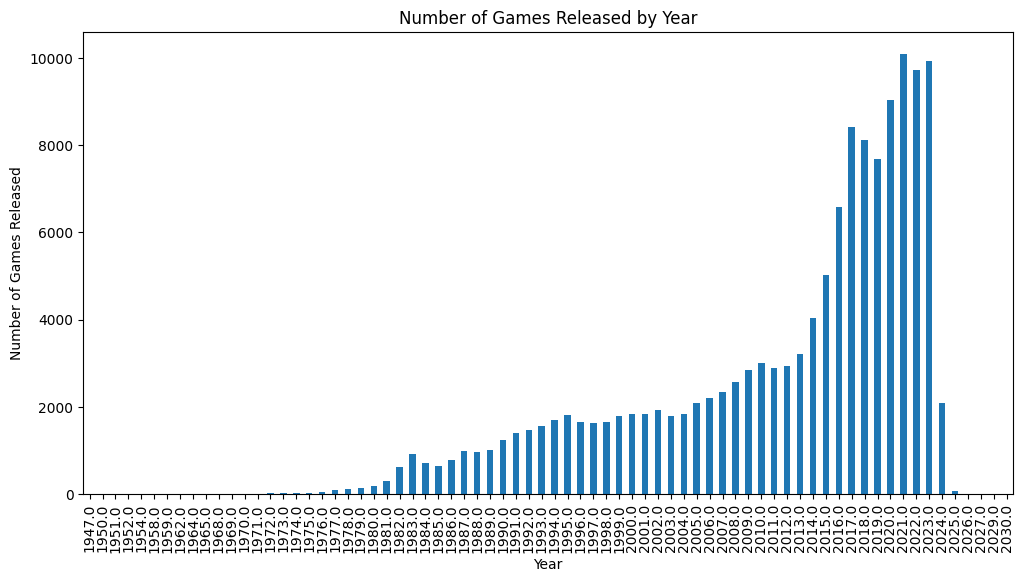

In [19]:
# Convert 'date' column to datetime, coercing errors to NaT
games_df['date'] = pd.to_datetime(games_df['date'], errors='coerce')

# Get the earliest (min) and latest (max) dates
min_date = games_df['date'].min()
max_date = games_df['date'].max()

print(f"Earliest date: {min_date}")
print(f"Latest date: {max_date}")


# Extract the year from the date
games_df['year'] = games_df['date'].dt.year

# Count the number of games released each year
games_per_year = games_df['year'].value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Number of Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.show()




I am having my doubts currently about the possible usage of the rows where the date is not given, but I also do not know if there is a correlation between the date and something else. For now, let us leave it again like this and start looking into the rest of the features and datasets

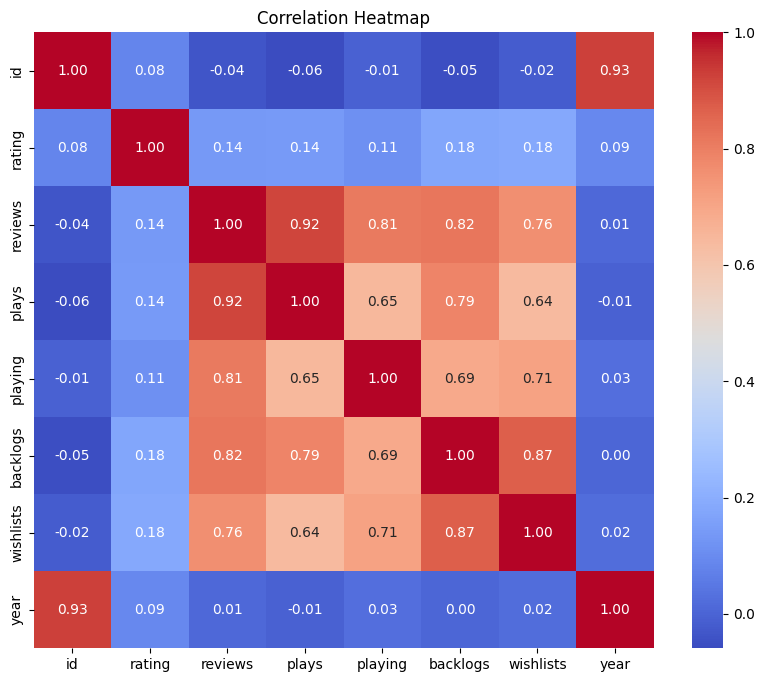

In [20]:
# Select only the numerical columns
numerical_games_df = games_df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_games_df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

As expected the `reviews`,`plays`,`playing`,`backlogs` and `wishlists` features do seem to have quite a good amount of correlation within eachother

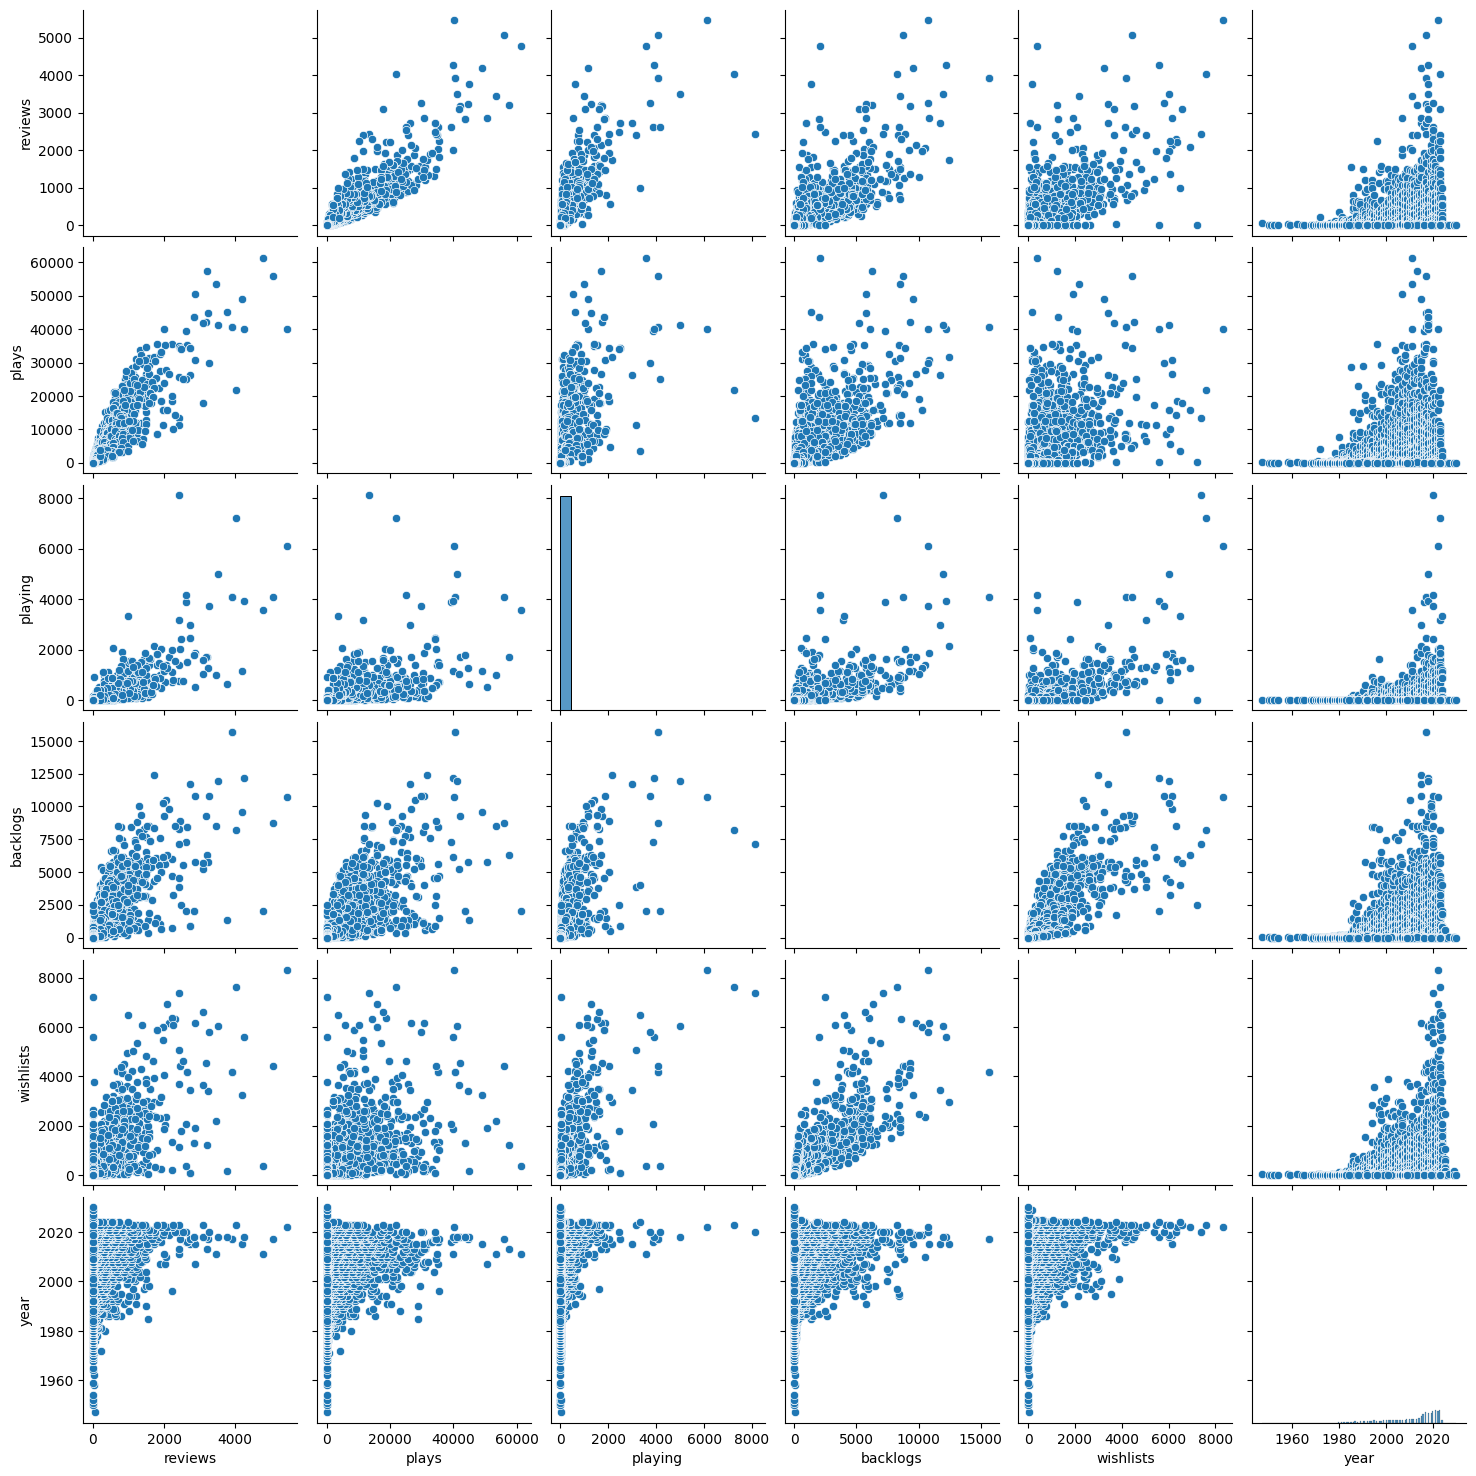

In [21]:
# Select the columns to plot
cols = ['reviews', 'plays', 'playing', 'backlogs', 'wishlists', 'year']
subset_df = games_df[cols]

# Create a scatter plot matrix
sns.pairplot(subset_df)
plt.show()

## Observation from the scatterplot:
 we do not see a specific pattern that we can take up to work with, however we will probably get pack to these problems as well soon.

## Genres dataset
 Let us take a look into the genres dataset and see what we can do there

In [22]:
print(genres_df.nunique()) 
genres_df.head(15)


id       147369
genre        23
dtype: int64


id              genre
0   1000001    Point-and-Click
1   1000002             Puzzle
2   1000002           Tactical
3   1000003            Pinball
4   1000003           Strategy
5   1000004  Card & Board Game
6   1000005             Puzzle
7   1000005           Strategy
8   1000006              Sport
9   1000007             Arcade
10  1000007              Sport
11  1000008          Simulator
12  1000009            Shooter
13  1000009          Simulator
14  1000010           Strategy

From what we see it does seem like it would be a wise idea to proceed in this direction:

    1. Put all of the genres of a game to be on the same row
    
    2. Encode it in a way so that the genres are looked into as a binary yes/no columns

## Data Preparation:

***Putting the genres of a game in the same row:***

In [23]:
# Convert the 'genre' column to string
genres_df['genre'] = genres_df['genre'].astype(str)

# Group by 'id' and join the genres into a single string
genres_df = genres_df.groupby('id')['genre'].apply(', '.join).reset_index()

In [24]:
genres_df.head(10)


id               genre
0  1000001     Point-and-Click
1  1000002    Puzzle, Tactical
2  1000003   Pinball, Strategy
3  1000004   Card & Board Game
4  1000005    Puzzle, Strategy
5  1000006               Sport
6  1000007       Arcade, Sport
7  1000008           Simulator
8  1000009  Shooter, Simulator
9  1000010            Strategy

***Performing one-hot encoding to have the genres "vectorised"***

In [25]:
# Perform one-hot encoding
genres_df_encoded = genres_df['genre'].str.get_dummies(sep=', ')

# Join the encoded genres back to the 'id' column
genres_df_encoded = pd.concat([genres_df['id'], genres_df_encoded], axis=1)

genres_df_encoded.head(10)

id  Adventure  Arcade  Brawler  Card & Board Game  Fighting  Indie  \
0  1000001          0       0        0                  0         0      0   
1  1000002          0       0        0                  0         0      0   
2  1000003          0       0        0                  0         0      0   
3  1000004          0       0        0                  1         0      0   
4  1000005          0       0        0                  0         0      0   
5  1000006          0       0        0                  0         0      0   
6  1000007          0       1        0                  0         0      0   
7  1000008          0       0        0                  0         0      0   
8  1000009          0       0        0                  0         0      0   
9  1000010          0       0        0                  0         0      0   

   MOBA  Music  Pinball  ...  RPG  Racing  Real Time Strategy  Shooter  \
0     0      0        0  ...    0       0                   0        0   
1     0      0        0  ...    0       0                   0        0   
2     0      0        1  ...    0       0                   0        0   
3     0      0        0  ...    0       0                   0        0   
4     0      0        0  ...    0       0                   0        0   
5     0      0        0  ...    0       0                   0        0   
6     0      0        0  ...    0       0                   0        0   
7     0      0        0  ...    0       0                   0        0   
8     0      0        0  ...    0       0                   0        1   
9     0      0        0  ...    0       0                   0        0   

   Simulator  Sport  Strategy  Tactical  Turn Based Strategy  Visual Novel  
0          0      0         0         0                    0             0  
1          0      0         0         1                    0             0  
2          0      0         1         0                    0             0  
3          0      0         0         0                    0             0  
4          0      0         1         0                    0             0  
5          0      1         0         0                    0             0  
6          0      1         0         0                    0             0  
7          1      0         0         0                    0             0  
8          1      0         0         0                    0             0  
9          0      0         1         0                    0             0  

[10 rows x 24 columns]

What would be let's say the top 10 most popular genres

genre
indie        50501
adventure    49653
simulator    22828
rpg          22320
strategy     21701
shooter      18542
puzzle       17496
arcade       14872
platform     14025
sport        10407
Name: count, dtype: int64


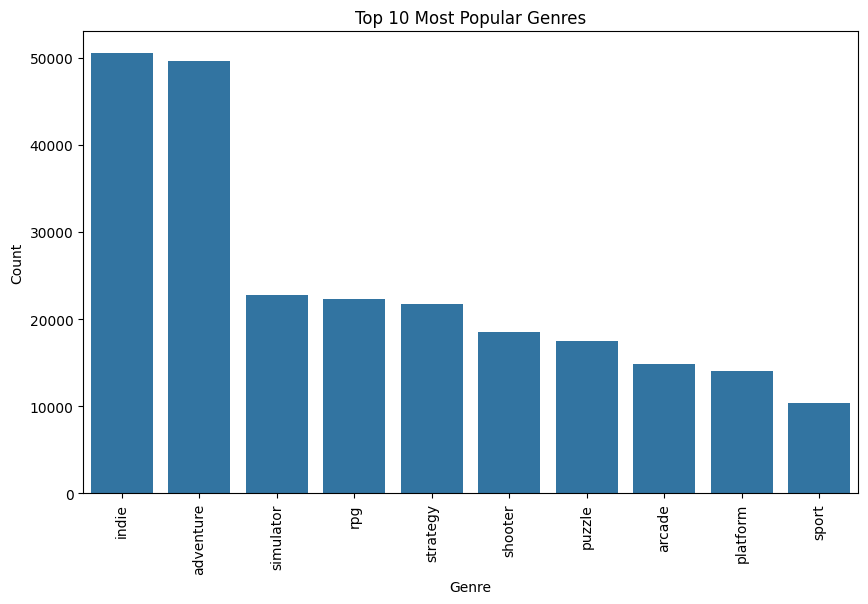

In [26]:
# Convert genre names to lowercase, split on comma, strip whitespaces from each genre name, and count the occurrences
genre_counts = genres_df['genre'].str.lower().str.split(',').apply(lambda x: [i.strip() for i in x]).explode().value_counts()

# Select the top 10 genres
top_10_genres = genre_counts.head(10)

# Print the top 10 genres
print(top_10_genres)

# Create a bar plot of the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

As expected, it would be normal to see that many of the games are of the `Adventure` as well as it would seem that we do have quite a lot of games which are `Indie` as well

### Now let us combine what we have done until now 


In [27]:
# Merge the two DataFrames on 'id'
combined_df = pd.merge(games_df, genres_df_encoded, on='id', how='inner')
combined_df_no_encoding =  pd.merge(games_df, genres_df, on='id', how='inner')


In [28]:
print(combined_df.shape)
combined_df.head()

(147368, 34)


id                               name       date  rating  reviews  \
0  1000001  Cathode Ray Tube Amusement Device 1947-12-31     3.5     65.0   
1  1000002                   Bertie the Brain 1950-08-25     2.5     11.0   
2  1000003                                Nim 1951-12-31     1.8      2.0   
3  1000004                           Draughts 1952-08-31     2.4      3.0   
4  1000005                                OXO 1952-12-31     3.1     14.0   

   plays  playing  backlogs  wishlists  \
0  117.0      1.0      28.0       56.0   
1   24.0      0.0       6.0       12.0   
2   11.0      0.0       2.0        6.0   
3   17.0      0.0       3.0        7.0   
4   52.0      1.0      12.0       13.0   

                                         description  ...  RPG  Racing  \
0  The cathode ray tube amusement device is the e...  ...    0       0   
1  Currently considered the first videogame in hi...  ...    0       0   
2  The Nimrod was a special purpose computer that...  ...    0       0   
3  A game of draughts (a.k.a. checkers) written f...  ...    0       0   
4  OXO was a computer game developed by Alexander...  ...    0       0   

   Real Time Strategy  Shooter  Simulator  Sport  Strategy  Tactical  \
0                   0        0          0      0         0         0   
1                   0        0          0      0         0         1   
2                   0        0          0      0         1         0   
3                   0        0          0      0         0         0   
4                   0        0          0      0         1         0   

   Turn Based Strategy  Visual Novel  
0                    0             0  
1                    0             0  
2                    0             0  
3                    0             0  
4                    0             0  

[5 rows x 34 columns]

### I do However question if it is possible to find a certain way to maybe use the genres to find the years, but I am still not sure if that may be possible 

C:\Users\kenar\AppData\Local\Temp\ipykernel_1396\1492821078.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = combined_df.resample('M', on='date')[genres].sum()


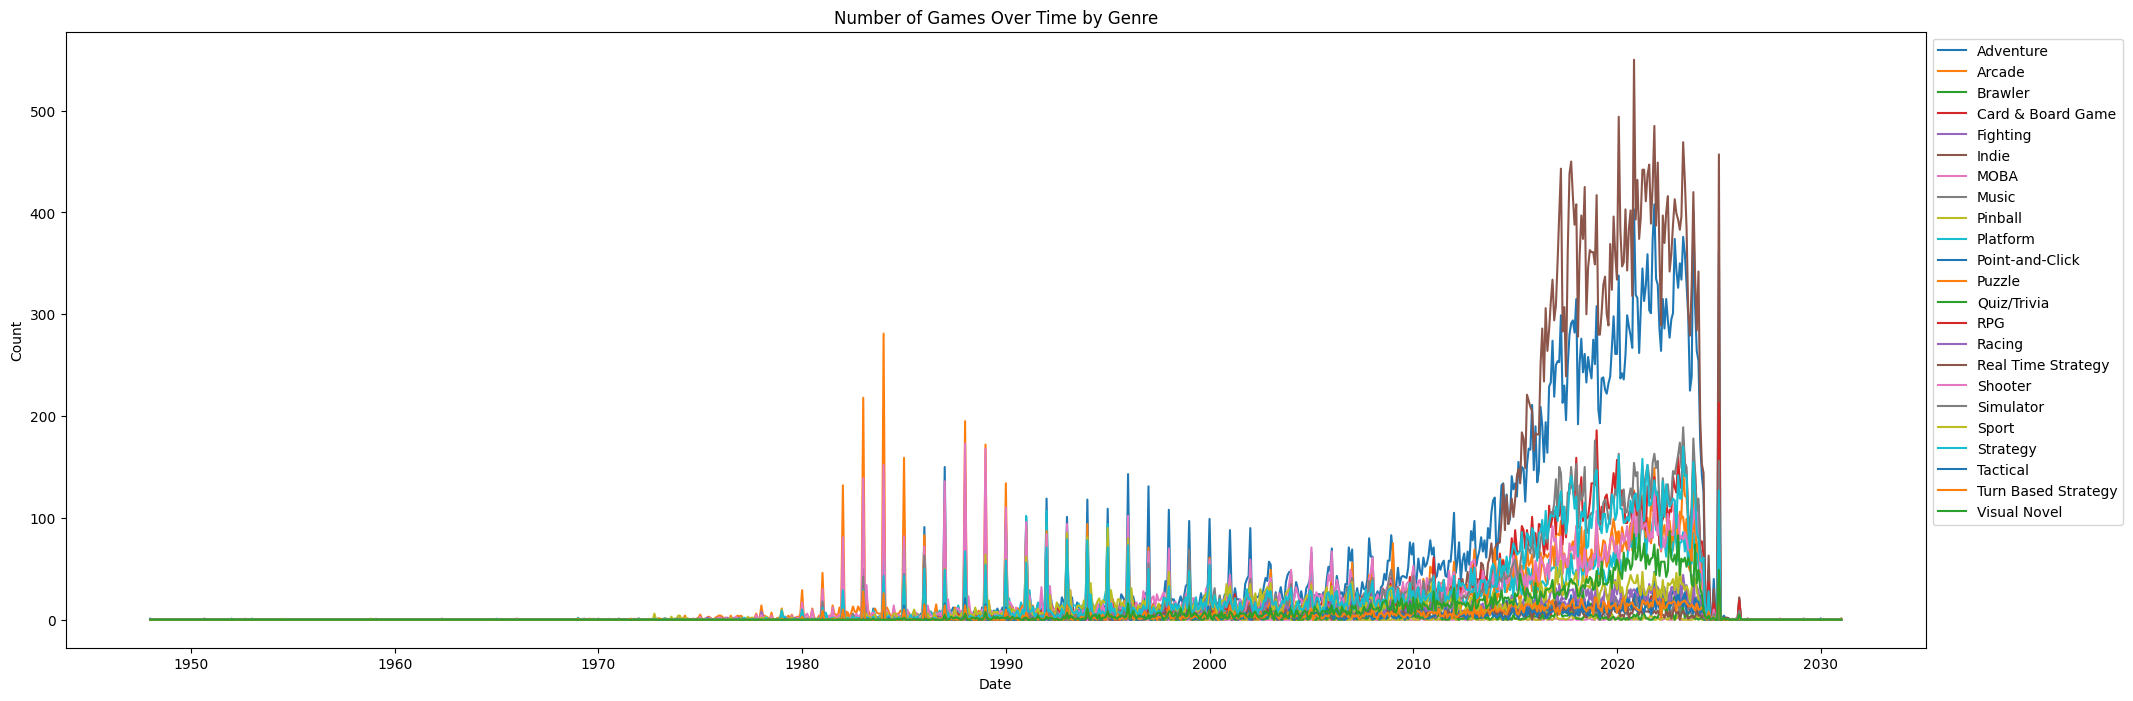

In [29]:
# Convert 'release_date' to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'])

# List of genres
genres = ['Adventure', 'Arcade', 'Brawler', 'Card & Board Game', 'Fighting', 'Indie', 'MOBA', 'Music',
          'Pinball', 'Platform', 'Point-and-Click', 'Puzzle', 'Quiz/Trivia', 'RPG', 'Racing', 
          'Real Time Strategy', 'Shooter', 'Simulator', 'Sport', 'Strategy', 'Tactical', 
          'Turn Based Strategy', 'Visual Novel']

# Resample the data by month and count the number of games for each genre
monthly_counts = combined_df.resample('M', on='date')[genres].sum()

# Create a line plot for each genre
plt.figure(figsize=(24, 8))
for genre in genres:
    plt.plot(monthly_counts.index, monthly_counts[genre], label=genre)
plt.title('Number of Games Over Time by Genre')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

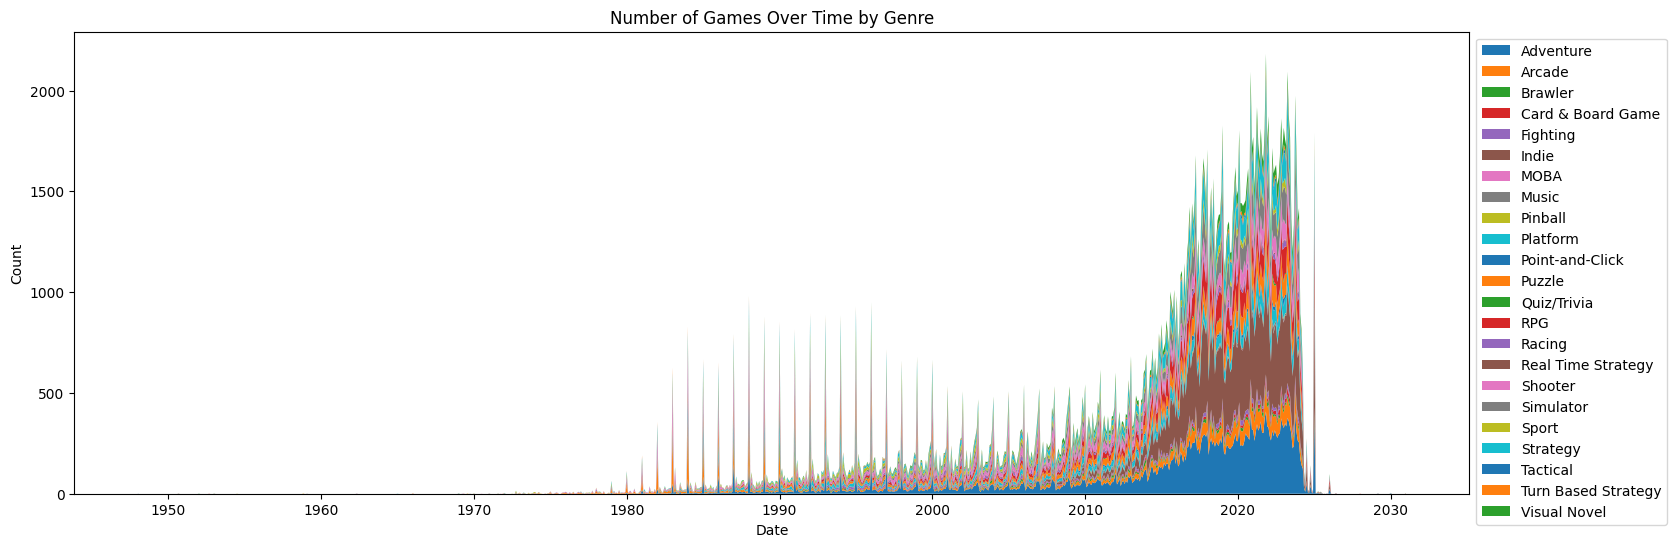

In [30]:
# Create a stacked area plot for each genre
plt.figure(figsize=(18, 6))
plt.stackplot(monthly_counts.index, monthly_counts[genres].T)
plt.title('Number of Games Over Time by Genre')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(genres, loc='upper left', bbox_to_anchor=(1,1))
plt.show()

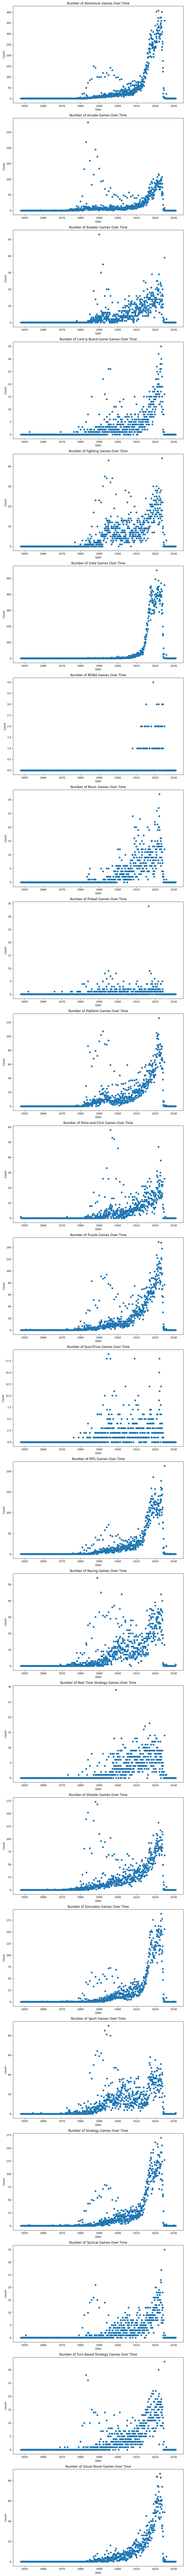

In [31]:
# Create a scatter plot for each genre
fig, axs = plt.subplots(len(genres), figsize=(10, 6*len(genres)))
for i, genre in enumerate(genres):
    axs[i].scatter(monthly_counts.index, monthly_counts[genre])
    axs[i].set_title('Number of ' + genre + ' Games Over Time')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

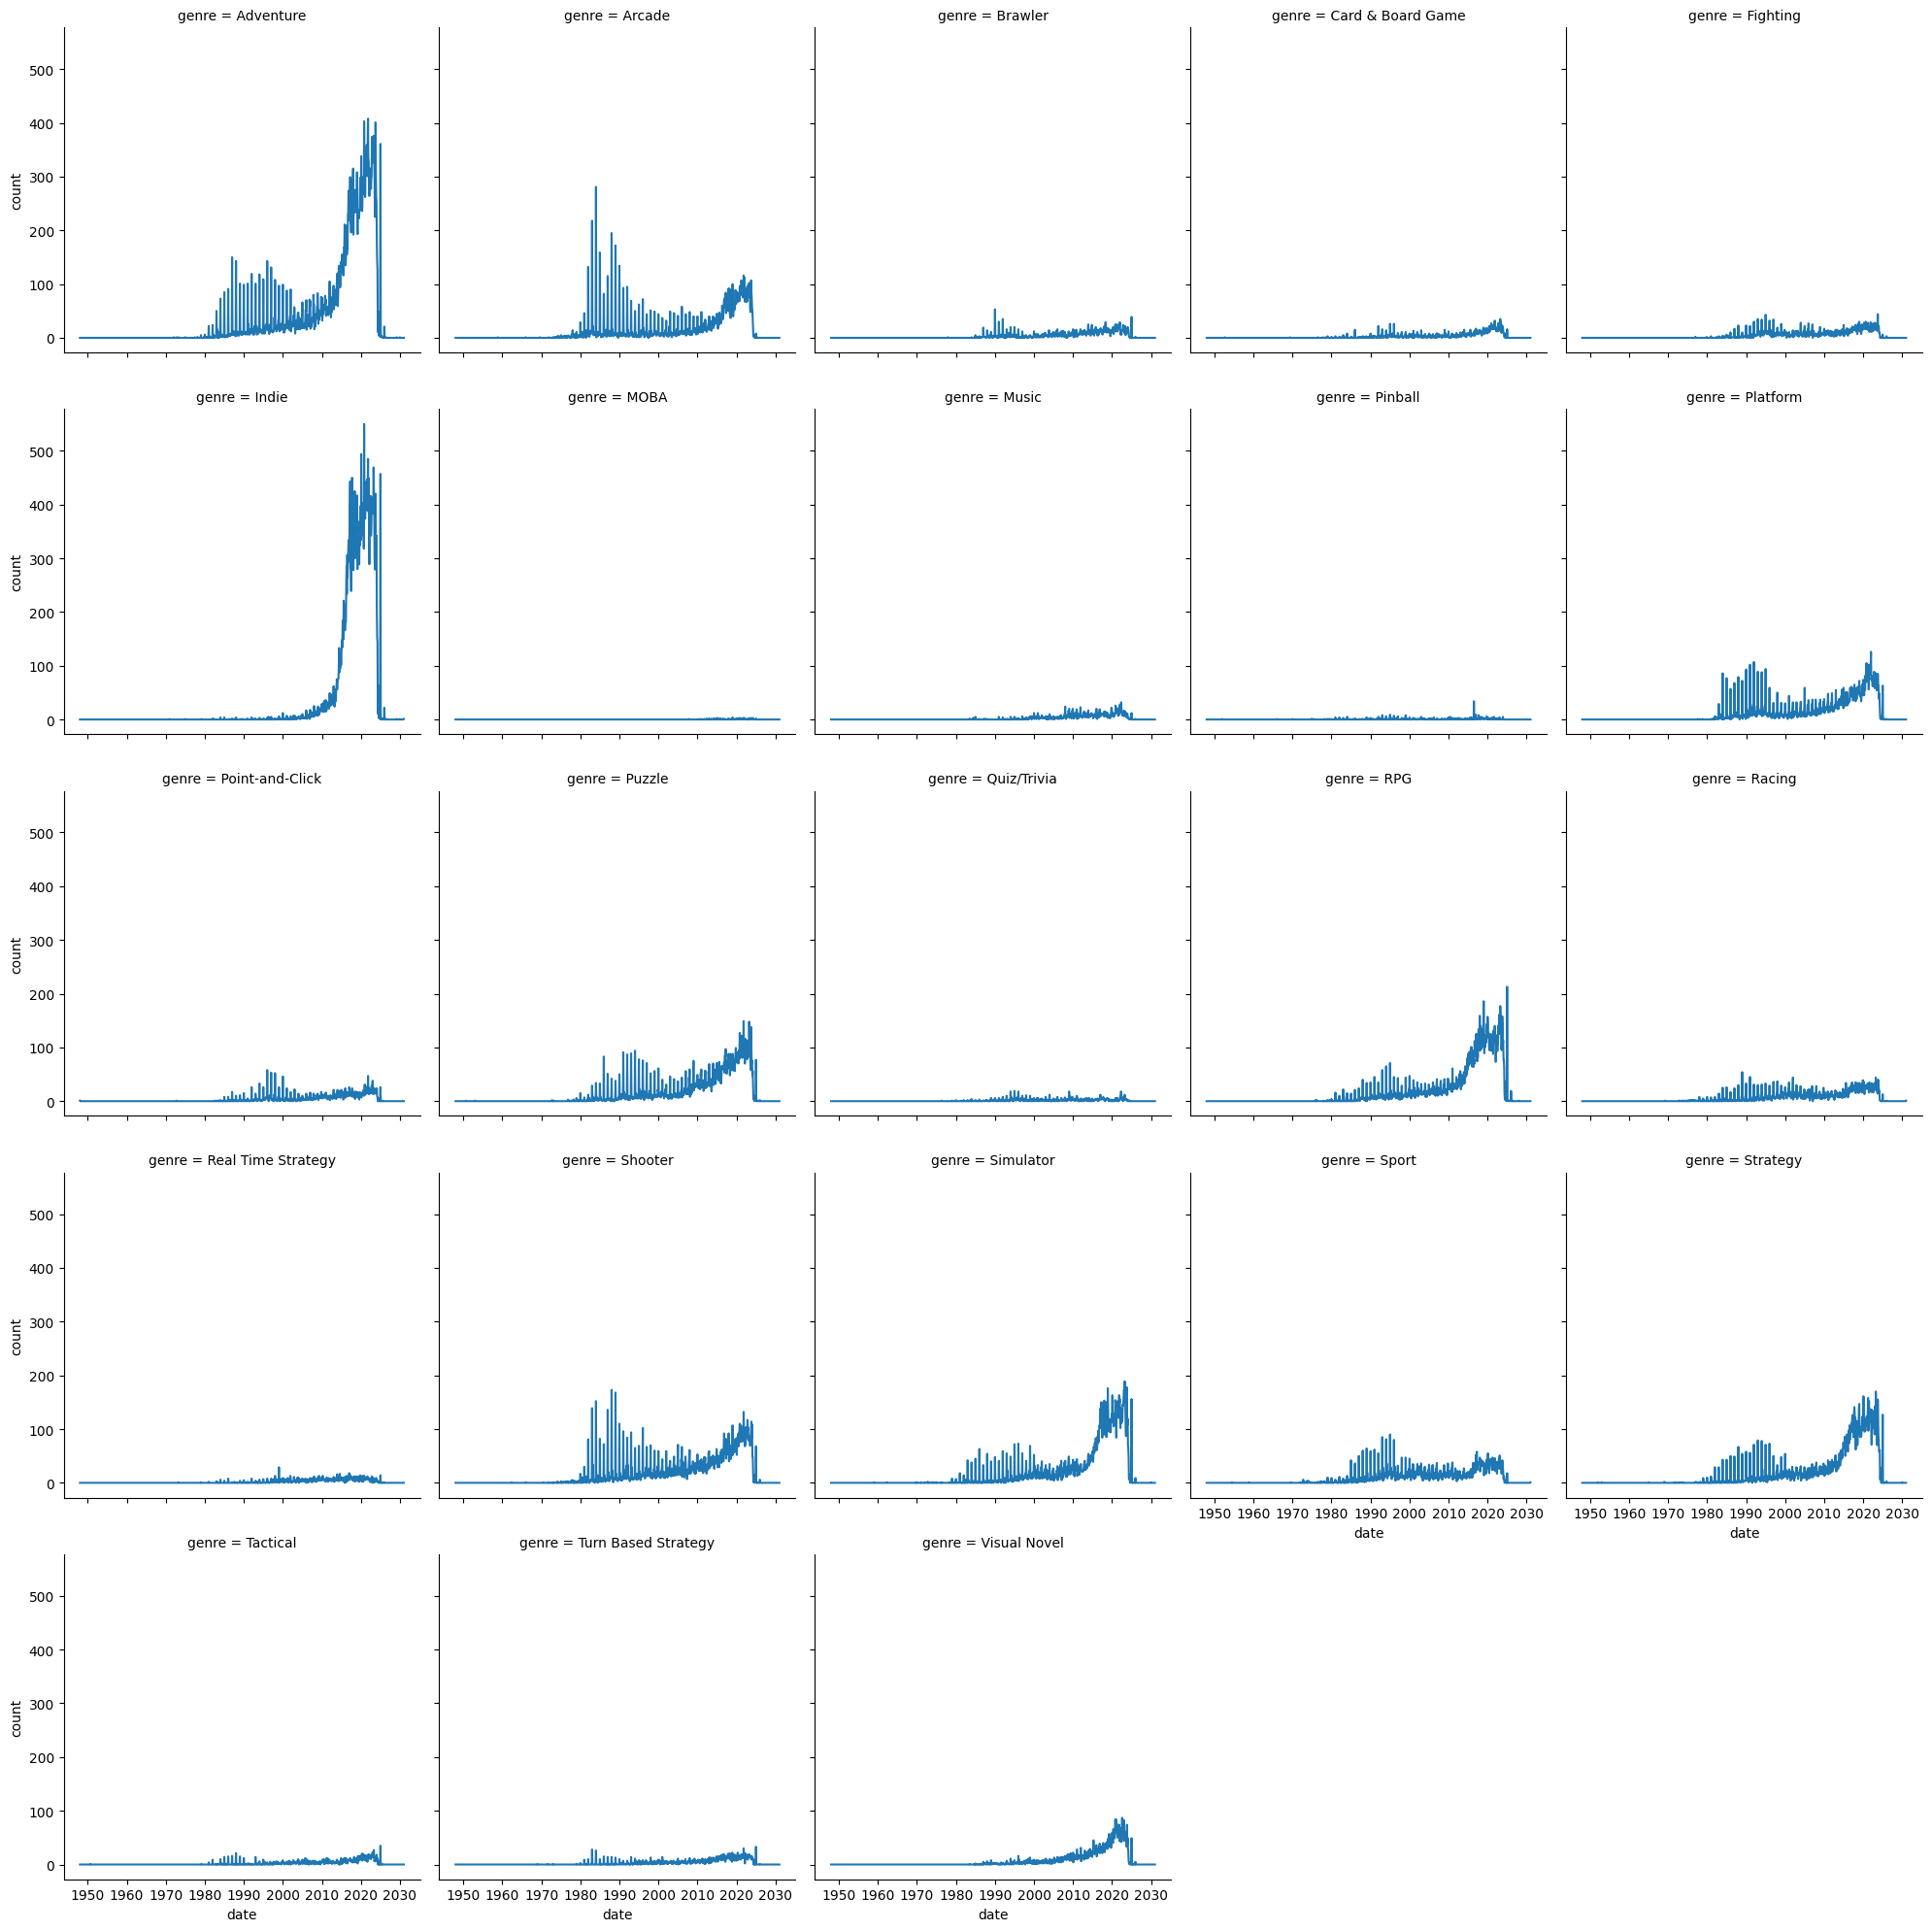

In [32]:
# Reshape the DataFrame
reshaped_df = monthly_counts.reset_index().melt(id_vars='date', var_name='genre', value_name='count')

# Create a FacetGrid
g = sns.FacetGrid(reshaped_df, col='genre', col_wrap=5, height=4)
g = g.map(plt.plot, 'date', 'count')
plt.show()

### It does not really feel like it so I will probably just leave it like that for now, Let us continue looking into the empty spots


In [33]:
games_df.isna().sum()

id                  0
name                0
date            34781
rating         116942
reviews             1
plays             694
playing           694
backlogs          694
wishlists         694
description     18924
year            34781
dtype: int64

In [34]:
# Convert 'date' to datetime if it's not already
games_df['date'] = pd.to_datetime(games_df['date'])

# Extract the year from the date
games_df['release_year'] = games_df['date'].dt.year

# Calculate the average rating per year
average_rating_per_year = games_df.groupby('release_year')['rating'].mean()


In [35]:

# Print the average rating per year
print(average_rating_per_year)

release_year
1947.0    3.500000
1950.0    2.500000
1951.0    1.800000
1952.0    2.750000
1954.0    3.000000
            ...   
2025.0    1.966667
2026.0         NaN
2027.0         NaN
2029.0         NaN
2030.0         NaN
Name: rating, Length: 72, dtype: float64


It is understandable that years which will be released in the future still do not have a rating. The cleaning will continue. Now we will take our attention to reviews 

In [36]:
# Find rows where 'reviews' is NaN
empty_reviews_rows = games_df[games_df['reviews'].isna()]

# Print the empty reviews rows
empty_reviews_rows

id            name       date  rating  reviews  plays  playing  \
136540  1136541  Enigma of Fear 2024-03-31     2.3      NaN   21.0      0.0   

        backlogs  wishlists  \
136540      42.0      230.0   

                                              description    year  \
136540  Become Mia, a paranormal detective searching f...  2024.0   

        release_year  
136540        2024.0

This is understandable again, however I am interested to see what is the case with games that are anounced after 2024

In [37]:
# Create a subset of games released after 2024
games_after_2024 = games_df[games_df['release_year'] > 2024]

# Print the 'reviews' column of the subset
games_after_2024.sample(15)

id                          name       date  rating  reviews  \
137667  1137668           Pixel Piracy Online 2025-12-31     NaN      0.0   
137712  1137713                 Plague Hunter 2029-02-07     NaN      0.0   
137689  1137690                    DecaPolice 2025-12-31     NaN      0.0   
137669  1137670          Monster Hunter Wilds 2025-12-31     NaN      3.0   
137680  1137681                         Mouse 2025-12-31     NaN      1.0   
137702  1137703              Celestial Crowns 2025-12-31     NaN      0.0   
137648  1137649                       A.I.L.A 2025-02-01     NaN      0.0   
137698  1137699     Until the Last Plane 1942 2025-12-31     NaN      0.0   
137692  1137693                      Big Walk 2025-12-31     NaN      0.0   
137674  1137675           Grand Theft Auto VI 2025-12-31     NaN     16.0   
137704  1137705  The Awakener: Forgotten Oath 2025-12-31     NaN      0.0   
137656  1137657                Dragon Blazers 2025-04-05     NaN      0.0   
137709  1137710                   Margaritari 2026-01-01     NaN      0.0   
137706  1137707           Grand Theft Auto VI 2025-12-31     NaN     16.0   
137714  1137715                    Loop Craft 2029-12-31     NaN      0.0   

        plays  playing  backlogs  wishlists  \
137667    0.0      0.0       0.0        0.0   
137712    0.0      0.0       2.0       11.0   
137689    5.0      1.0     127.0      575.0   
137669    5.0      1.0     155.0      646.0   
137680    0.0      0.0      87.0      371.0   
137702    0.0      0.0       1.0        3.0   
137648    0.0      0.0       4.0       36.0   
137698    0.0      0.0       0.0        0.0   
137692    0.0      0.0      63.0      333.0   
137674   83.0      6.0     557.0     2452.0   
137704    1.0      0.0       5.0        2.0   
137656    0.0      0.0       1.0        5.0   
137709    0.0      0.0       4.0       12.0   
137706   83.0      6.0     557.0     2452.0   
137714    0.0      0.0       0.0        0.0   

                                              description    year  \
137667  Pirate MMO RPG that has it all. You will play ...  2025.0   
137712  Plague Hunter is an indie platformer game in t...  2029.0   
137689  DecaPolice, a crime-suspense RPG from Level-5,...  2025.0   
137669  Monster Hunter Wilds. The next generation in t...  2025.0   
137680  Join private detective John Mouston in MOUSE, ...  2025.0   
137702  The King is dead! Take the throne in this choi...  2025.0   
137648  A.I.L.A is a first-person horror game develope...  2025.0   
137698  Soar across the skies of World War II in this ...  2025.0   
137692  Hang out and get lost with close friends in a ...  2025.0   
137674  Grand Theft Auto VI heads to the state of Leon...  2025.0   
137704  The Awakener: Forgotten Oath is a rogue-like a...  2025.0   
137656  Dragon Blazers is a mix between 16bit arcade a...  2025.0   
137709  "Margaritari", a JRPG-style narrative game. Co...  2026.0   
137706  Grand Theft Auto VI heads to the state of Leon...  2025.0   
137714  Loop Craft is a game about economics. There is...  2029.0   

        release_year  
137667        2025.0  
137712        2029.0  
137689        2025.0  
137669        2025.0  
137680        2025.0  
137702        2025.0  
137648        2025.0  
137698        2025.0  
137692        2025.0  
137674        2025.0  
137704        2025.0  
137656        2025.0  
137709        2026.0  
137706        2025.0  
137714        2029.0

After looking more into it and what the is going on on the site, it does show that there are games with reviews, although the their still have not been released, in that case it does seem alright if we just substitute the reviews of games after 2024 with a `0`

Another example of what I saw:
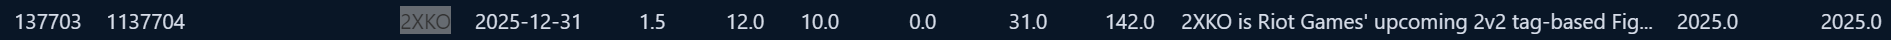


However on the site, we are not shown any reviews -  https://www.backloggd.com/games/2xko/


 This is a problem that is happening to games that have not been released yet, so I do believe that it will be alright if we put the reviews at 0 for the games after 2024 

In [38]:
games_df.sample(15)

id                                               name       date  \
19821   1019822                                         No Respect 1997-12-31   
170932  1170933                      Fun School 3: for the over 7s        NaT   
145930  1145931                                 The Great War 1918        NaT   
35190   1035191            Tom Clancy's Rainbow Six: Critical Hour 2006-03-14   
32458   1032459                            Donkey Kong Jungle Beat 2004-12-16   
133276  1133277                                     Model Employee 2023-09-30   
67636   1067637                                 Gems of the Aztecs 2016-04-22   
89802   1089803                                     Wings of Glass 2019-02-11   
142147  1142148              Severed Steel: Digital Deluxe Edition        NaT   
148445  1148446                                         Painkiller        NaT   
20928   1020929                 Tsun Tsun Gumi: Suuji de Puni-puni 1998-09-23   
11124   1011125                                         Trip World 1992-11-27   
106971  1106972                                     Gravity Heroes 2021-02-19   
24584   1024585  Ace Ventura Pet Detective: The Case of the Ser... 2000-09-26   
77371   1077372                             ICY: Frostbite Edition 2017-08-11   

        rating  reviews   plays  playing  backlogs  wishlists  \
19821      NaN      0.0     0.0      0.0       0.0        1.0   
170932     NaN      0.0     1.0      0.0       0.0        0.0   
145930     NaN      0.0     0.0      0.0       0.0        0.0   
35190      2.8      0.0    14.0      1.0      12.0       10.0   
32458      3.6     87.0  1385.0     11.0     363.0      187.0   
133276     4.0      2.0     4.0      0.0       5.0        1.0   
67636      NaN      0.0     1.0      0.0       0.0        0.0   
89802      NaN      0.0     3.0      0.0       1.0        0.0   
142147     NaN      0.0     0.0      0.0       2.0        1.0   
148445     NaN      0.0     2.0      1.0       1.0       18.0   
20928      NaN      0.0     0.0      0.0       1.0        0.0   
11124      3.1     24.0   264.0      2.0     140.0       76.0   
106971     NaN      1.0     6.0      0.0       5.0        3.0   
24584      NaN      1.0     5.0      0.0       0.0        4.0   
77371      3.1      0.0     7.0      0.0      11.0        0.0   

                                              description    year  \
19821   No Respect is an arena-based vehicular combat ...  1997.0   
170932                                                NaN     NaN   
145930  TGW 1918 is a WW1 modification for Company of ...     NaN   
35190   In Tom Clancy's Rainbow Six Critical Hour, Ubi...  2006.0   
32458   Donkey Kong Jungle Beat is a Nintendo GameCube...  2004.0   
133276  Model Employee is a corporate horror visual no...  2023.0   
67636   A dangerous journey into the ruins of an ancie...  2016.0   
89802   Mayfly, a girl with glass wings, is kidnapped ...  2019.0   
142147  The Severed Steel Digital Deluxe Edition inclu...     NaN   
148445  New publishing label Prime Matter is bringing ...     NaN   
20928                                                 NaN  1998.0   
11124   In Trip World, you play as a strange creature ...  1992.0   
106971  Gravity Heroes gives you the ability to change...  2021.0   
24584                                                 NaN  2000.0   
77371   ICY: Frostbite Edition is a narrative-driven p...  2017.0   

        release_year  
19821         1997.0  
170932           NaN  
145930           NaN  
35190         2006.0  
32458         2004.0  
133276        2023.0  
67636         2016.0  
89802         2019.0  
142147           NaN  
148445           NaN  
20928         1998.0  
11124         1992.0  
106971        2021.0  
24584         2000.0  
77371         2017.0

In [39]:
# Drop 'year' and 'release_year' columns
games_df = games_df.drop(['year', 'release_year'], axis=1)

In [40]:
games_df.isna().sum()

id                  0
name                0
date            34781
rating         116942
reviews             1
plays             694
playing           694
backlogs          694
wishlists         694
description     18924
dtype: int64

In [41]:
# Find rows where 'reviews' is NaN
empty_reviews_rows = games_df[games_df['reviews'].isna()]

# Print the empty reviews rows
empty_reviews_rows

id            name       date  rating  reviews  plays  playing  \
136540  1136541  Enigma of Fear 2024-03-31     2.3      NaN   21.0      0.0   

        backlogs  wishlists                                        description  
136540      42.0      230.0  Become Mia, a paranormal detective searching f...

In [42]:
games_df['reviews'] = games_df['reviews'].fillna(0)
print(games_df)

             id                                         name       date  \
0       1000001            Cathode Ray Tube Amusement Device 1947-12-31   
1       1000002                             Bertie the Brain 1950-08-25   
2       1000003                                          Nim 1951-12-31   
3       1000004                                     Draughts 1952-08-31   
4       1000005                                          OXO 1952-12-31   
...         ...                                          ...        ...   
172507  1172508  Super Robot Wars 30: Digital Deluxe Edition        NaT   
172508  1172509           Xotic: Temple Crypt Expansion Pack        NaT   
172509  1172510                                 Dust Raiders        NaT   
172510  1172511                                    EXE Clash        NaT   
172511  1172512      Dance Killer Trick!!!: Boys, Be Dancing        NaT   

        rating  reviews  plays  playing  backlogs  wishlists  \
0          3.5     65.0  117.0     

In [43]:
games_df.isna().sum()

id                  0
name                0
date            34781
rating         116942
reviews             0
plays             694
playing           694
backlogs          694
wishlists         694
description     18924
dtype: int64

### Scatterplot for the with the genres - not encoded

In [44]:
genres_df.head()

id              genre
0  1000001    Point-and-Click
1  1000002   Puzzle, Tactical
2  1000003  Pinball, Strategy
3  1000004  Card & Board Game
4  1000005   Puzzle, Strategy

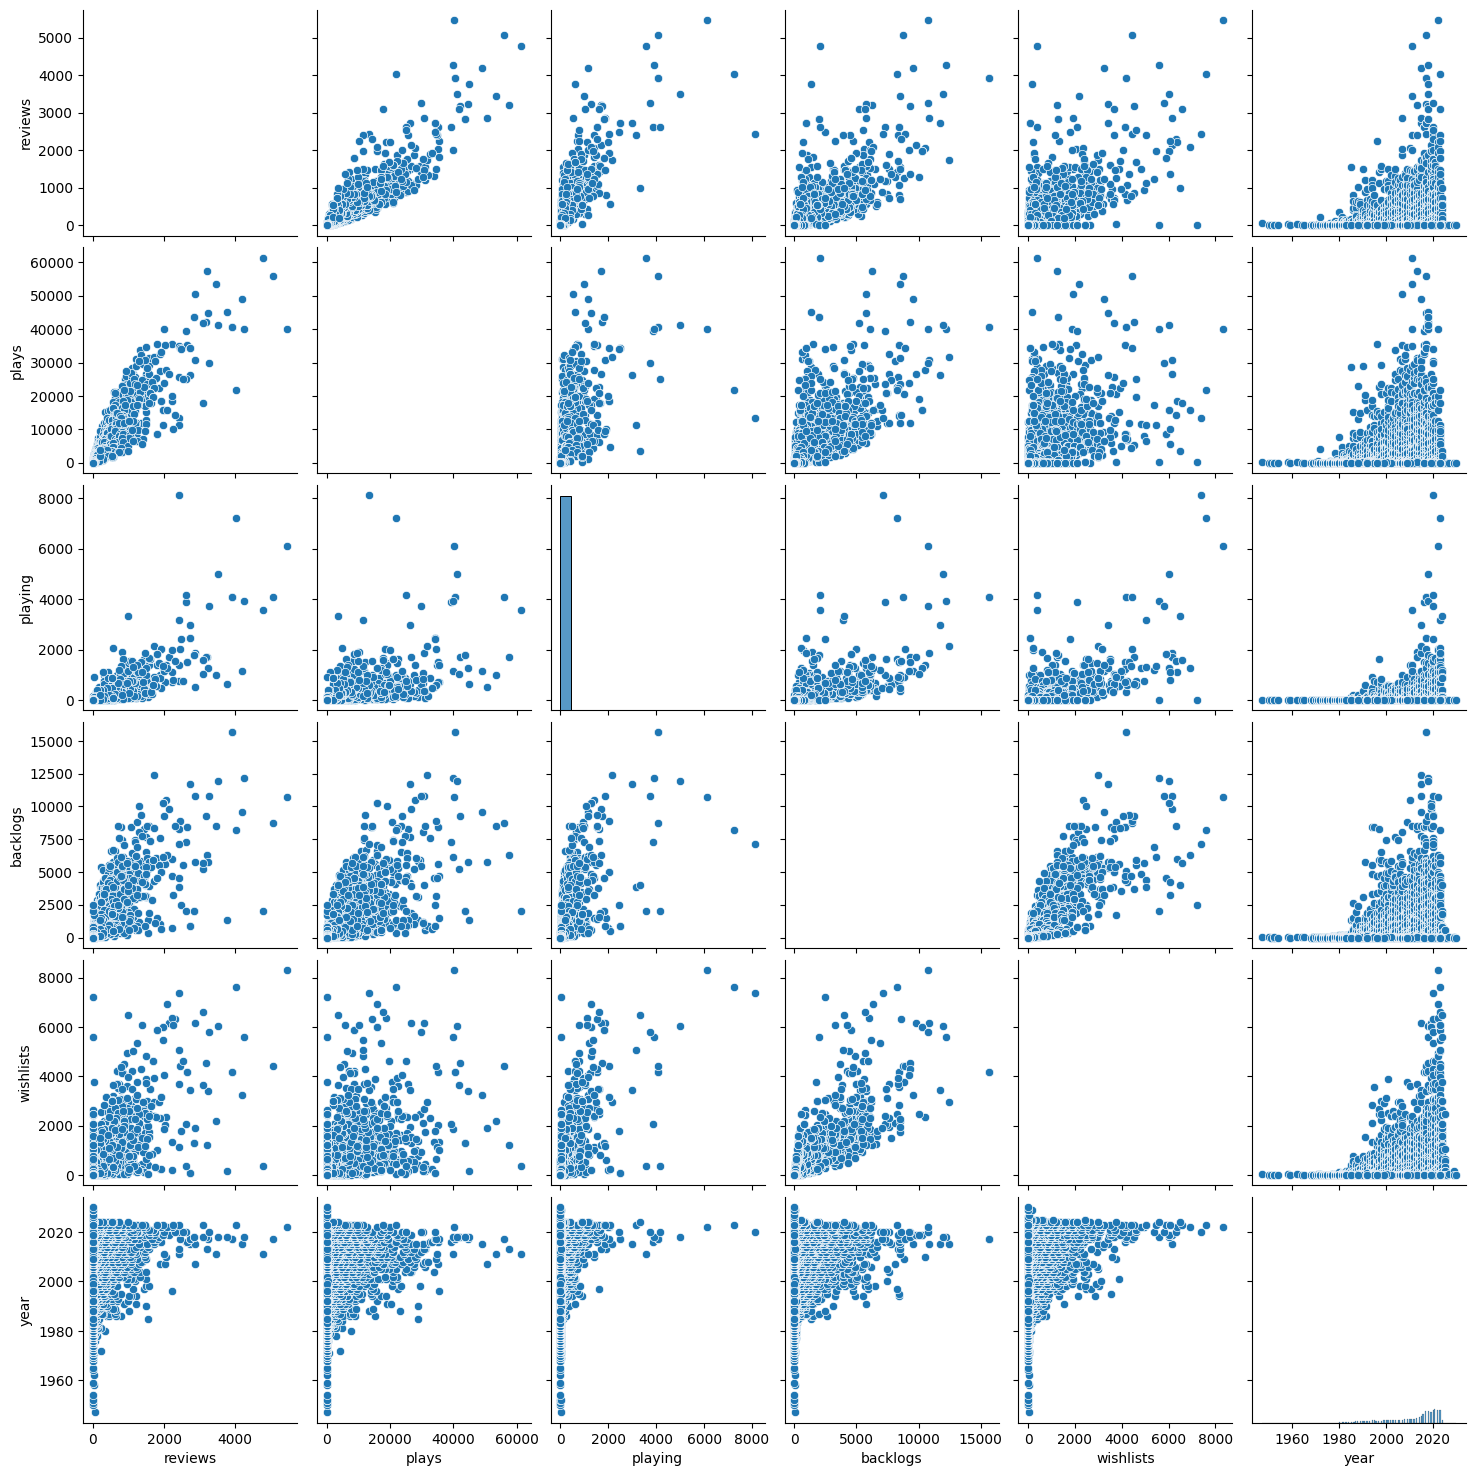

In [45]:
# Select the columns to plot
cols1 = ['reviews', 'plays', 'playing', 'backlogs', 'wishlists', 'year']

subset_df = combined_df_no_encoding[cols1]

# Create a scatter plot matrix
sns.pairplot(subset_df)

plt.show()

In [46]:
print(games_df.isna().sum())
games_df.sample(15)


id                  0
name                0
date            34781
rating         116942
reviews             0
plays             694
playing           694
backlogs          694
wishlists         694
description     18924
dtype: int64


id                                             name       date  \
111436  1111437                                 Dungeon Break TD 2021-07-30   
84861   1084862                                     Octo Gravity 2018-07-03   
118825  1118826                                   Echoes of Mana 2022-04-30   
145363  1145364                                       Juicy Futa        NaT   
6254    1006255                                       Modem Wars 1988-12-31   
8260    1008261                                      After Burst 1990-10-26   
19014   1019015                              Game Boy Wars Turbo 1997-06-24   
17338   1017339  Tiny Toons Adventures: Buster and the Beanstalk 1996-05-09   
144728  1144729            Yakari: The Mystery of Four - Seasons        NaT   
4238    1004239         Moero TwinBee: Cinnamon Hakushi o Sukue! 1986-12-21   
72769   1072770                                         Unhack 2 2017-01-12   
131134  1131135          Guitar Hero II: Deluxe - Brand New Hero 2023-07-11   
24139   1024140                         Super Robot Taisen Alpha 2000-05-25   
115904  1115905                                     Dinosaur Era 2022-01-01   
69828   1069829                               Supercontinent LTD 2016-09-01   

        rating  reviews  plays  playing  backlogs  wishlists  \
111436     NaN      0.0    2.0      0.0       0.0        0.0   
84861      NaN      0.0    0.0      0.0       0.0        0.0   
118825     2.5      1.0   26.0      0.0      16.0       12.0   
145363     NaN      0.0    4.0      0.0       0.0        1.0   
6254       NaN      0.0    1.0      0.0       1.0        0.0   
8260       2.8      2.0    7.0      0.0      11.0        5.0   
19014      NaN      1.0    1.0      0.0       9.0        3.0   
17338      3.0      1.0   13.0      0.0       3.0        0.0   
144728     NaN      0.0    0.0      0.0       0.0        0.0   
4238       2.9      3.0    9.0      0.0       0.0        0.0   
72769      NaN      0.0    1.0      0.0       0.0        3.0   
131134     NaN      0.0    1.0      0.0       1.0        0.0   
24139      3.6      7.0   45.0      1.0      38.0       26.0   
115904     NaN      0.0    2.0      0.0       0.0        0.0   
69828      2.5      1.0   14.0      0.0       5.0        4.0   

                                              description  
111436  Immerse in this epic journey, where Tower Defe...  
84861   Jump and run in an octagon full of obstacles a...  
118825  Under the Mana Tree, all lore and legends shal...  
145363  A lewd Visual-Novel about Futas on an open island  
6254    An early online multiplayer game for PC and Co...  
8260    Players must control a combat robot as they ma...  
19014   Game Boy Wars Turbo is an enhanced version of ...  
17338                                                 NaN  
144728  Step into the shoes of our hero in his new adv...  
4238    Save The Earth From An Alien Snack Attack!    ...  
72769   In this sequel to Unhack, the unhacker returns...  
131134                                                NaN  
24139   Super Robot Taisen Alpha is the second game in...  
115904  Let's fight the dinosaurs ! With a powerful wa...  
69828   A narrative adventure about making phone calls...

In [47]:
# Select rows where 'plays' is NaN
nan_plays = games_df[games_df['plays'].isna()]

# Print the selected rows
nan_plays.sample(15)

id                                               name       date  \
162917  1162918                           Pikot: Stream Chat Games        NaT   
55103   1055104           Sword of the Stars: The Pit - Mind Games 2013-07-03   
160499  1160500                           Memory games for kids 4+        NaT   
46102   1046103                   Pong Toss Pro - Frat Party Games 2010-06-28   
164376  1164377              ESPN Winter X Games Snowboarding 2002        NaT   
114490  1114491                    Disney Classic Games Collection 2021-11-12   
153568  1153569                                  War by Grow Games        NaT   
169370  1169371                        Offroad Games: Tractor Game        NaT   
28779   1028780              The Gladiators: Galactic Circus Games 2002-11-29   
46538   1046539  Doctor Who: The Adventure Games - Episode 3: T... 2010-08-27   
34262   1034263                             Gaelic Games: Football 2005-11-11   
97913   1097914                                Shadowgun War Games 2020-02-14   
142606  1142607                            Family Games Compendium        NaT   
153037  1153038            The Ultimate Adventure Games Pack Vol.1        NaT   
151820  1151821                      The Grip Games PS3 Collection        NaT   

        rating  reviews  plays  playing  backlogs  wishlists  \
162917     NaN      0.0    NaN      NaN       NaN        NaN   
55103      NaN      0.0    NaN      NaN       NaN        NaN   
160499     NaN      0.0    NaN      NaN       NaN        NaN   
46102      NaN      0.0    NaN      NaN       NaN        NaN   
164376     NaN      0.0    NaN      NaN       NaN        NaN   
114490     3.0      0.0    NaN      NaN       NaN        NaN   
153568     2.7      0.0    NaN      NaN       NaN        NaN   
169370     NaN      0.0    NaN      NaN       NaN        NaN   
28779      NaN      0.0    NaN      NaN       NaN        NaN   
46538      2.8      1.0    NaN      NaN       NaN        NaN   
34262      NaN      0.0    NaN      NaN       NaN        NaN   
97913      NaN      0.0    NaN      NaN       NaN        NaN   
142606     NaN      0.0    NaN      NaN       NaN        NaN   
153037     NaN      0.0    NaN      NaN       NaN        NaN   
151820     NaN      0.0    NaN      NaN       NaN        NaN   

                                              description  
162917  Pikot is a game that allows you to interact wi...  
55103   The first DLC expansion for Sword of the Stars...  
160499                                                NaN  
46102   Born on college campuses, Pong Toss is the ult...  
164376                                                NaN  
114490  The Expanded Collection - Play through multipl...  
153568                                                NaN  
169370                                                NaN  
28779   The Gladiators: Galactic Circus Games is a Rea...  
46538   Episode 3 of the Doctor Who Adventure Games se...  
34262   Gaelic Games: Football is a video game based o...  
97913   Tactical multiplayer FPS (First Person Shooter...  
142606  A three CD set of 20 "family" oriented games, ...  
153037                                                NaN  
151820                                                NaN

After having a look into the samples of the games that don't have any ***plays***, it does seem that they are connected heavily with the `playing`.`backlogs` and `wishlists`. There are quite some examples of data where we do not have neither the the release `date` or any of the `playing`.`backlogs`,`wishlists`,`plays` - notting when it comes to the `description` as well. 

Examples:

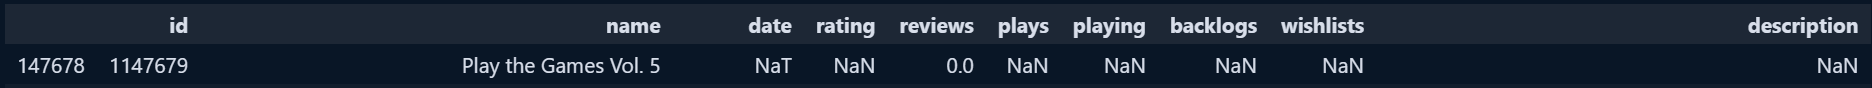
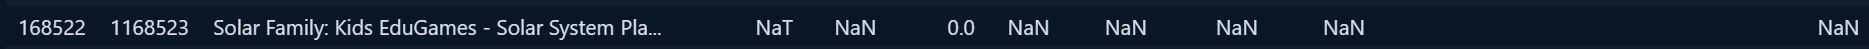

I looked them up on the site and I did see some cases where we might be able to find something, but it does not look like it 

https://www.backloggd.com/games/play-the-games-vol-5/

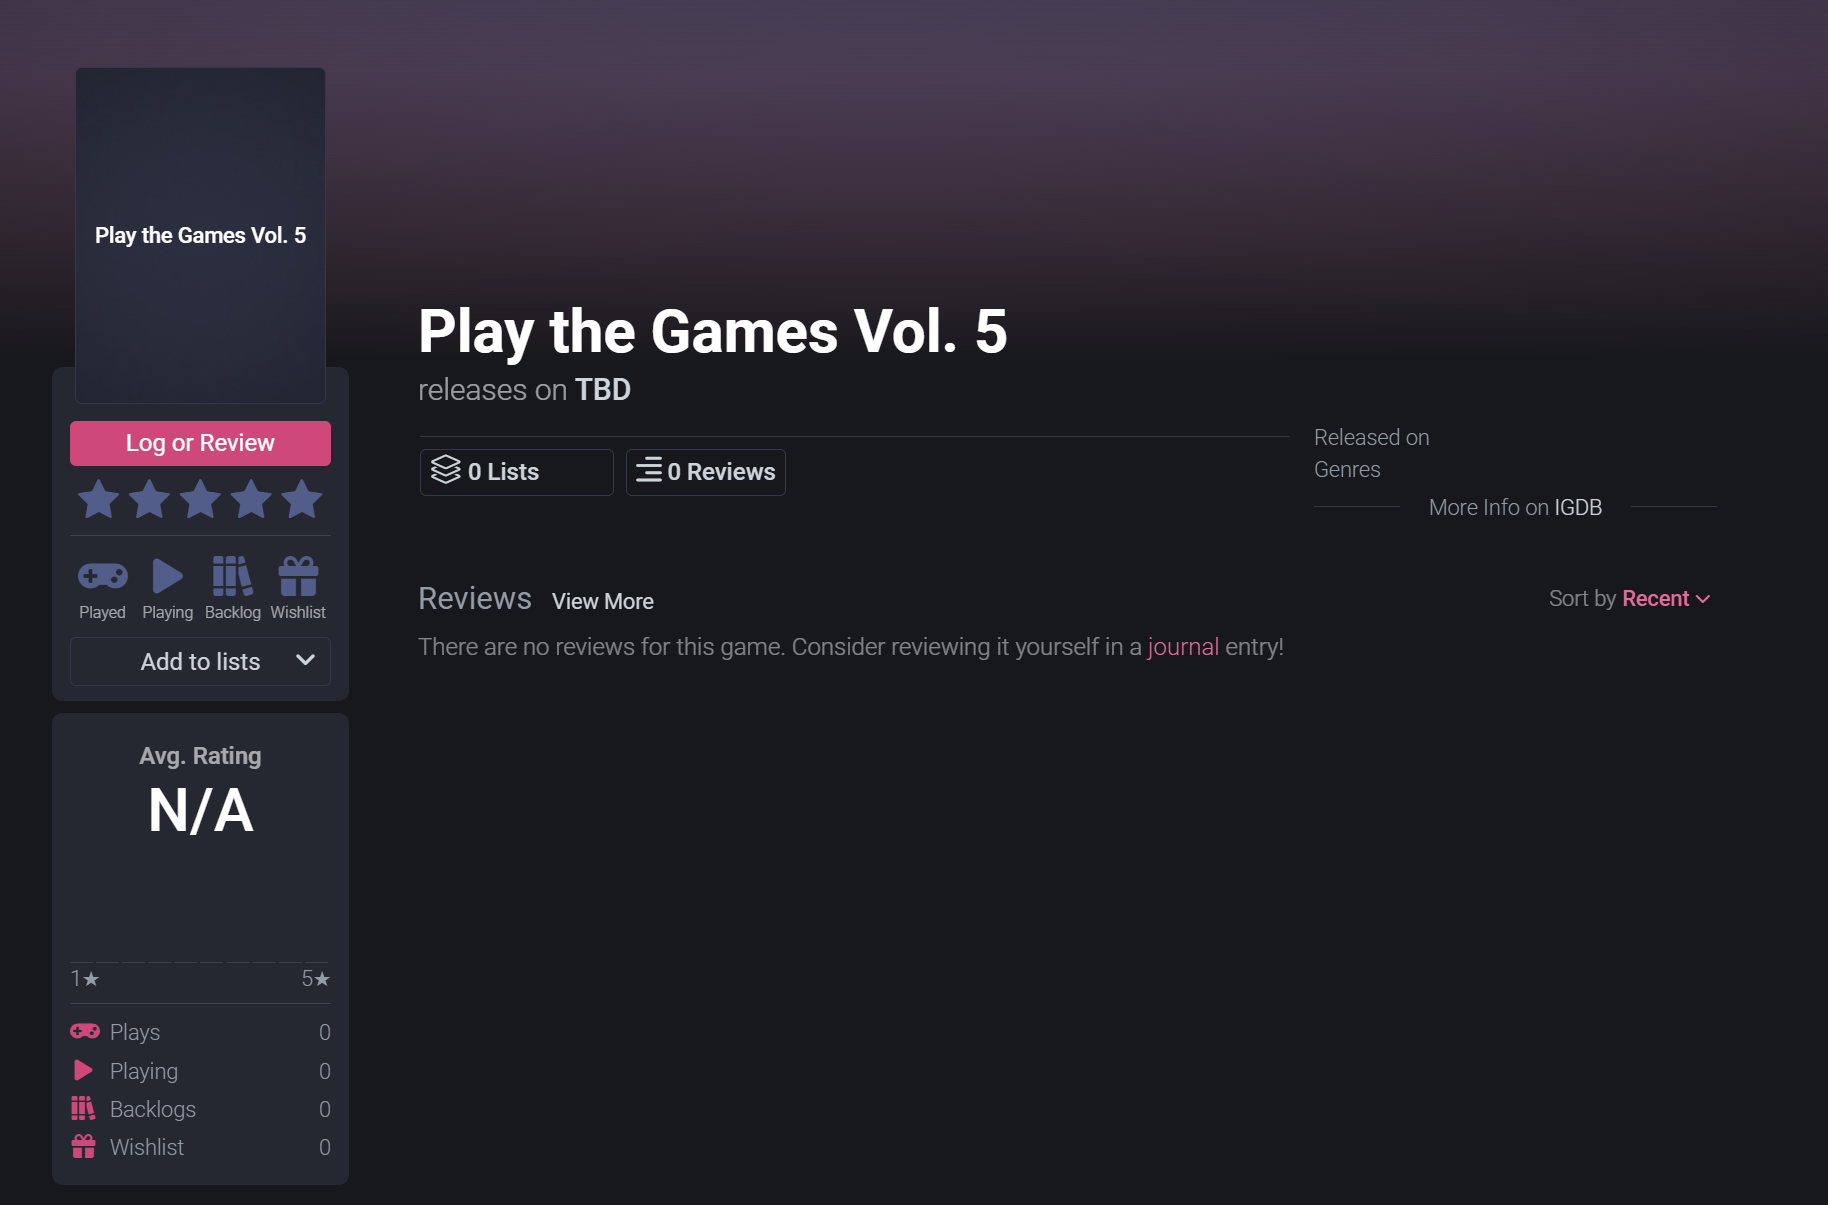


After finding this I do believe that It will be alright if we drop the columns that do not have neither a date nor anything else, they are pretty much empty rows with nothing but a title and id, so there is no reason for us to have a recommendation system that does not give anything of actaul value, to the user.

In [48]:
print(nan_plays.shape)

nan_plays.isna().sum()

(694, 10)


id               0
name             0
date           158
rating         530
reviews          0
plays          694
playing        694
backlogs       694
wishlists      694
description    172
dtype: int64

In [49]:
nan_plays.dropna(subset=['date', 'plays'], how='all', inplace=True)

nan_plays.isna().sum()

C:\Users\kenar\AppData\Local\Temp\ipykernel_1396\2504222685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_plays.dropna(subset=['date', 'plays'], how='all', inplace=True)


id               0
name             0
date             0
rating         386
reviews          0
plays          536
playing        536
backlogs       536
wishlists      536
description     67
dtype: int64

In [50]:
nan_plays.sample(15)


id                                               name       date  \
48228   1048229                                           AR Games 2011-02-26   
42922   1042923                                  Family Card Games 2009-06-02   
26513   1026514                 Rocket Power: Extreme Arcade Games 2001-10-14   
54419   1054420                     Close Up Pics - Fun Word Games 2013-04-14   
37118   1037119                        Crash Bandicoot Party Games 2007-01-01   
38112   1038113                               Spyglass Board Games 2007-08-01   
56543   1056544                                        Avakin Life 2013-12-10   
131862  1131863  Prison Life Simulator Jail: Gangster Escape Ga... 2023-08-11   
46363   1046364           Fantasy Slots: Adventure Slots and Games 2010-08-02   
24500   1024501                                   Vegas Games 2000 2000-09-01   
107965  1107966                                Doodle Games Bundle 2021-03-26   
47275   1047276                              18 Classic Card Games 2010-11-16   
36447   1036448                       Camp Lazlo: Leaky Lake Games 2006-11-06   
31868   1031869                            The EA Games Collection 2004-09-01   
16525   1016526                                Mega Games 6 Vol. 3 1995-12-31   

        rating  reviews  plays  playing  backlogs  wishlists  \
48228      2.6     35.0    NaN      NaN       NaN        NaN   
42922      NaN      0.0    NaN      NaN       NaN        NaN   
26513      NaN      1.0    NaN      NaN       NaN        NaN   
54419      NaN      0.0    NaN      NaN       NaN        NaN   
37118      2.4      0.0    NaN      NaN       NaN        NaN   
38112      1.8      0.0    NaN      NaN       NaN        NaN   
56543      NaN      0.0    NaN      NaN       NaN        NaN   
131862     NaN      0.0    NaN      NaN       NaN        NaN   
46363      NaN      0.0    NaN      NaN       NaN        NaN   
24500      NaN      0.0    NaN      NaN       NaN        NaN   
107965     NaN      0.0    NaN      NaN       NaN        NaN   
47275      NaN      0.0    NaN      NaN       NaN        NaN   
36447      1.0      4.0    NaN      NaN       NaN        NaN   
31868      NaN      0.0    NaN      NaN       NaN        NaN   
16525      NaN      0.0    NaN      NaN       NaN        NaN   

                                              description  
48228   AR Games are augmented reality games for the N...  
42922   Daddy, Mommy, Sarah and Billy are back for som...  
26513   Rocket Power: Extreme Arcade Games is a collec...  
54419   SIMPLE, FUN AND ADDICTIVE GAMEPLAY    - No com...  
37118   Crash Bandicoot Party Games is a mobile game t...  
38112   Play with a friend on Xbox LIVE, or play again...  
56543   The amazing virtual world where you can become...  
131862  Outwit, Outplay, Outlast: The Ultimate Prison ...  
46363   Slot play with either 3 or 5 reels. Earn money...  
24500   Vegas Games 2000 is a collection of casino gam...  
107965  Doodle God: Evolution Create and change your p...  
47275   Play Texas Hold 'Em, Blackjack, Rummy, Hearts ...  
36447   Camp Lazlo: Leaky Lake Games is an Action game...  
31868                                                 NaN  
16525   Mega 6 Vol. 3 is a compilation of Sega Mega Dr...

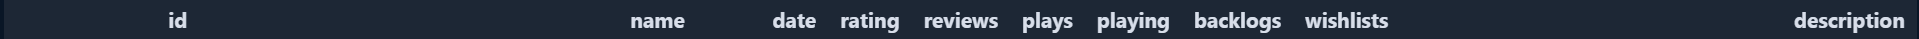
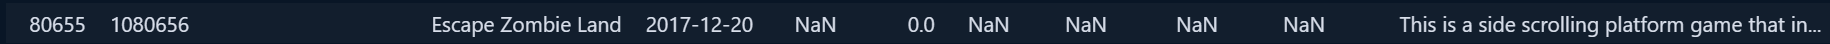
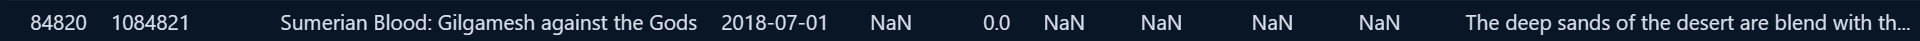
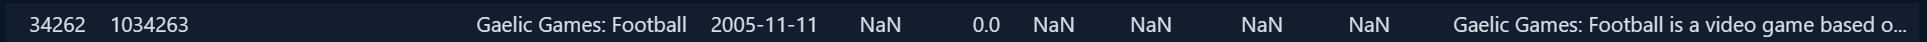
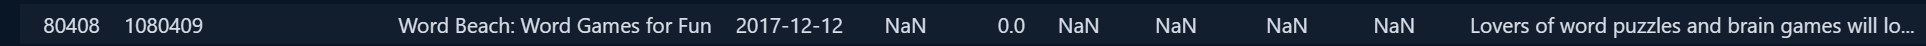
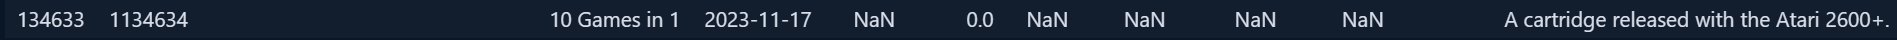


After looking into more of the examples that we have for games that do not have any values in the ones we are currently interested in it's either because of 2 things it would seem:

    1. It is some sort of a bundel of games that we do not have any details about
    2. The games actaully do not have that much data for them so they pretty much are 'left out' and have not been interacted with


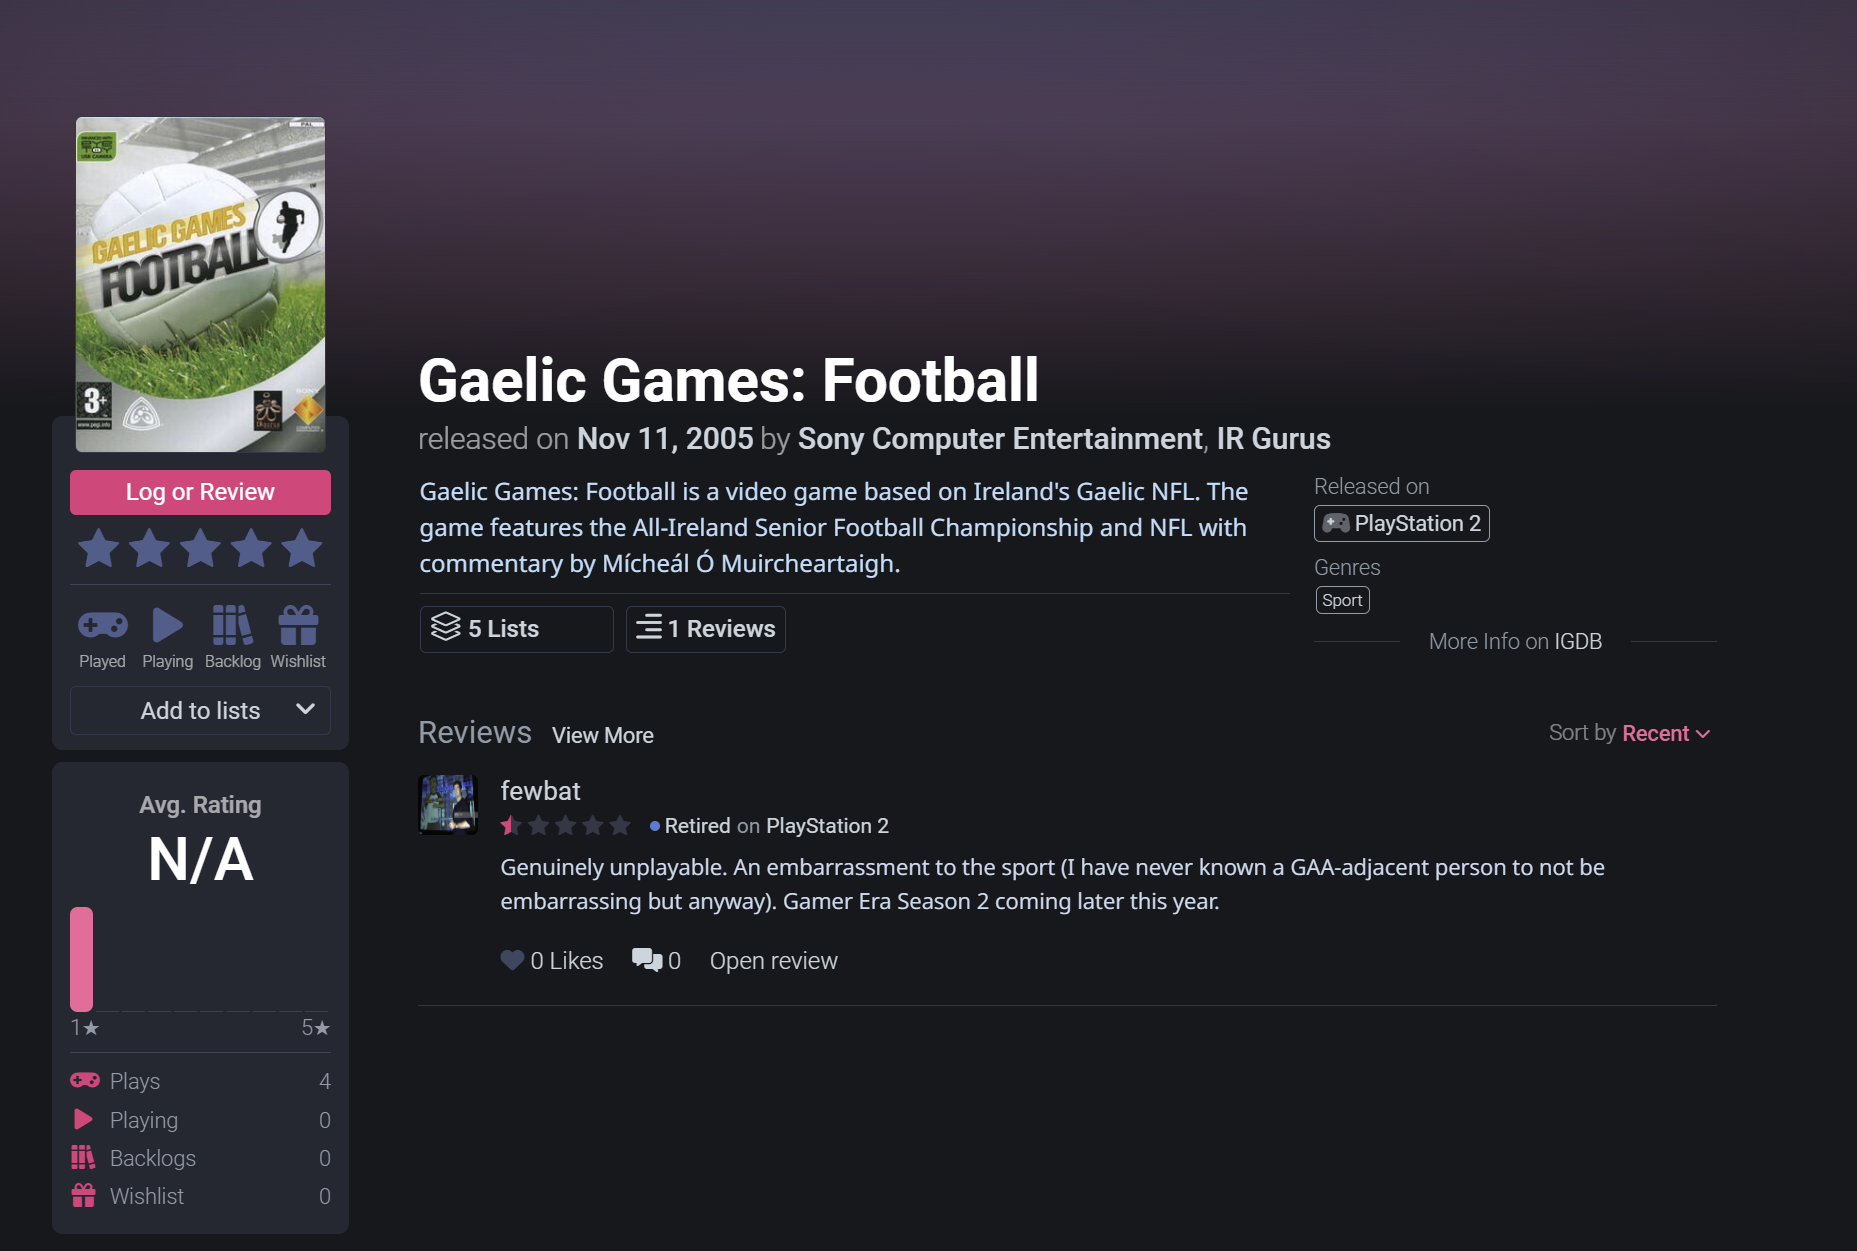

____________________________________________________________________________________Another Example __________________________________________________________________________

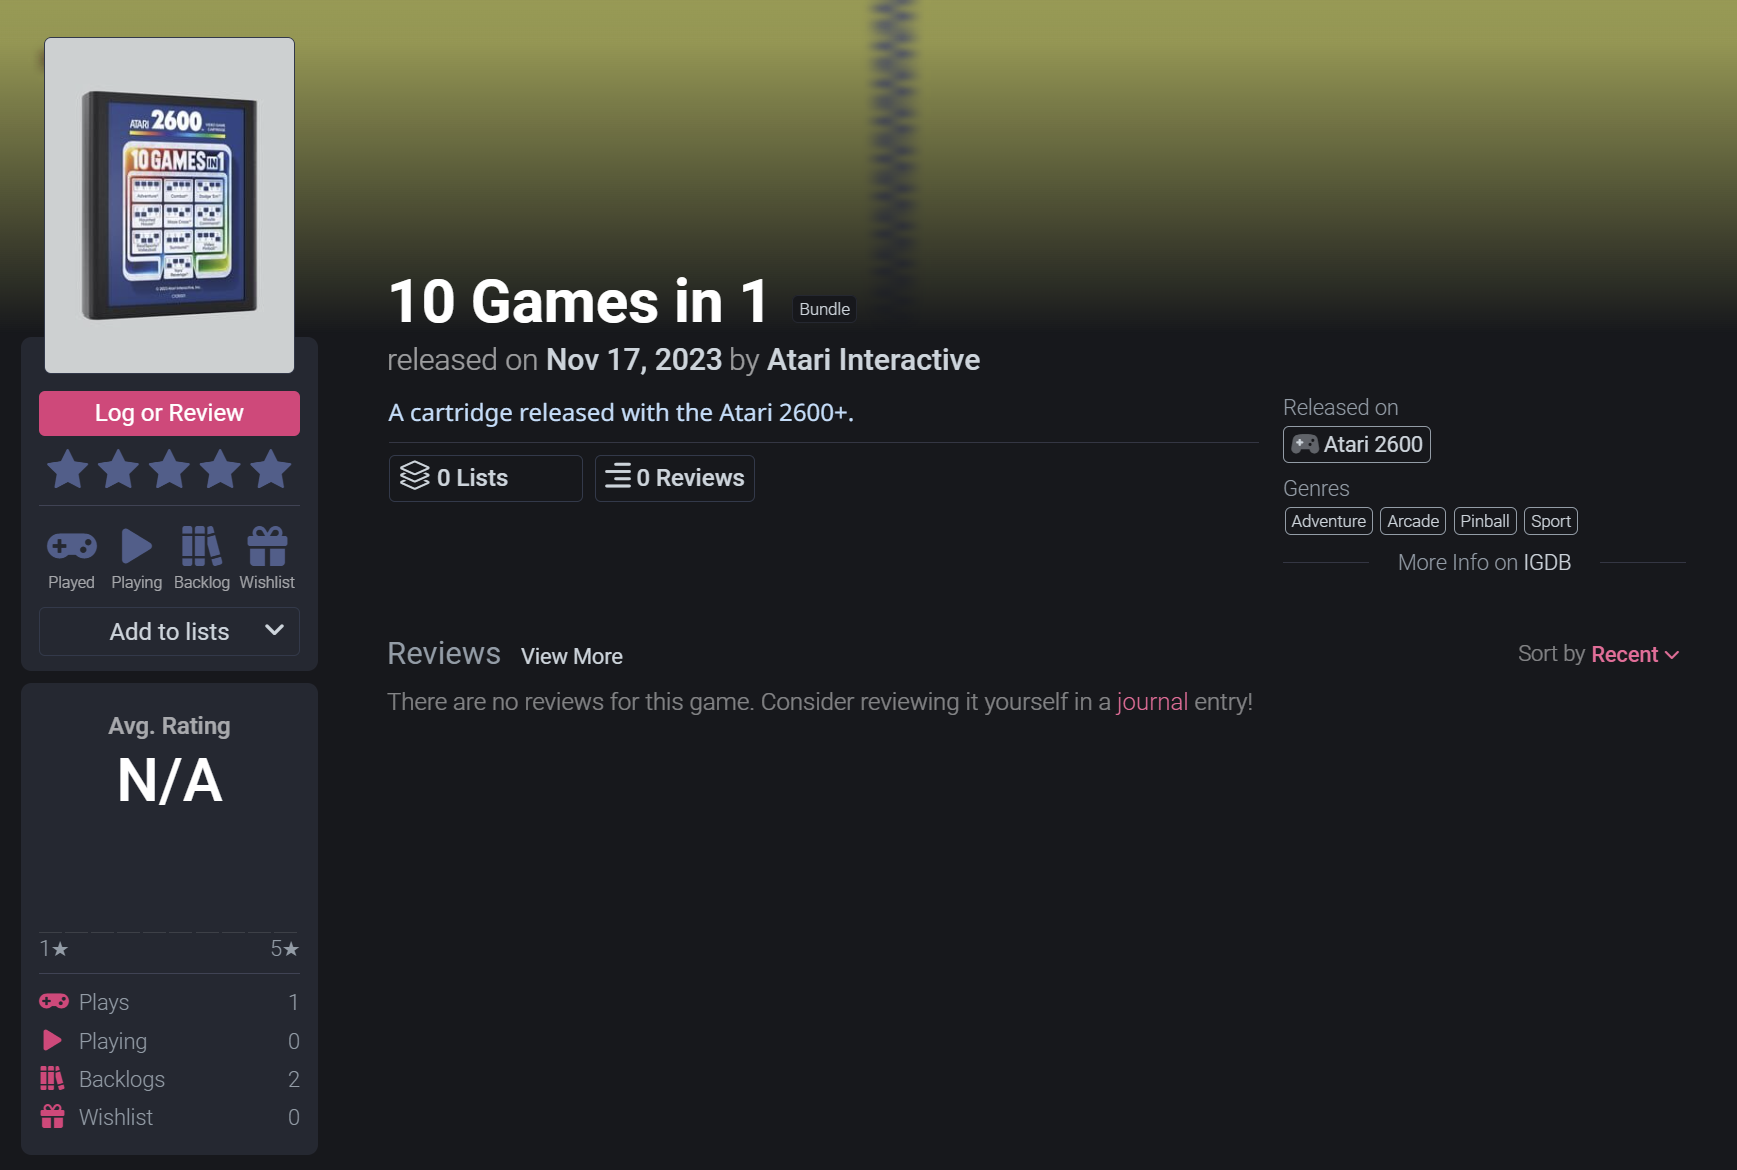

After considering all of this, I do believe that it will be fine to just drop all of the rows that have the missing values in `plays`,`playing`,`backlogs` and `wishlists`	

In [51]:
games_df.sample(15)

id                                               name       date  \
87803   1087804                       Teddy the Wanderer: Kayaking 2018-11-15   
145391  1145392                             Cheshire in a Chatroom        NaT   
49086   1049087                           Pro Cycling Manager 2011 2011-06-23   
75799   1075800  Senran Kagura: Peach Beach Splash - No Shirt, ... 2017-05-26   
56268   1056269  Company of Heroes 2: German Commander - Luftwa... 2013-11-13   
6041    1006042                                            Pac-Man 1988-10-01   
145206  1145207                            Deep Russian Depression        NaT   
130077  1130078     Solasta: Crown of the Magister - Palace of Ice 2023-05-25   
140917  1140918            Piofiore: Episodio 1926 Limited Edition        NaT   
31151   1031152                                 A Sound of Thunder 2004-02-28   
85724   1085725                     Fall of Light: Darkest Edition 2018-08-14   
144504  1144505                                     Pony Friends 2        NaT   
129113  1129114                                          Neotrogla 2023-04-22   
111799  1111800                                       Sliding Seas 2021-08-14   
6079    1006080                      Super Mario Bros. / Duck Hunt 1988-11-01   

        rating  reviews  plays  playing  backlogs  wishlists  \
87803      NaN      0.0    2.0      0.0       1.0        0.0   
145391     NaN      0.0    1.0      0.0       0.0        0.0   
49086      3.2      0.0    5.0      0.0       1.0        1.0   
75799      NaN      0.0    3.0      0.0       1.0        2.0   
56268      NaN      0.0    1.0      0.0       1.0        0.0   
6041       3.0      5.0   47.0      0.0       6.0        3.0   
145206     NaN      0.0    0.0      0.0       0.0        3.0   
130077     3.9      0.0    5.0      2.0      14.0        4.0   
140917     NaN      0.0    0.0      0.0       3.0        1.0   
31151      1.9      1.0   11.0      1.0       3.0        3.0   
85724      2.1      0.0   14.0      0.0       9.0        8.0   
144504     NaN      0.0    2.0      1.0       1.0        0.0   
129113     3.5     12.0   30.0      0.0      47.0       36.0   
111799     NaN      0.0    4.0      2.0       0.0        0.0   
6079       3.8     29.0  994.0      2.0      47.0       10.0   

                                              description  
87803   Join two friends in a beautiful journey among ...  
145391                         Drawing chatroom simulator  
49086   Experience an exceptional season at the head o...  
75799   Includes art book, music CD, Blue-ray compilat...  
56268   German Commander - Luftwaffe Supply Doctrine; ...  
6041    Tengen released a port of the Famicom version ...  
145206  “Deep Russian Depression” is a visual novel ab...  
130077  Although the heroes of Caer Cyflen managed to ...  
140917  Experience the continuation of each character’...  
31151   Based on the Franchise Pictures movie of the s...  
85724   Fall of Light is a story-driven dungeon crawle...  
144504  Pony Friends 2 is a horse-care simulation game...  
129113  Neotrogla is a Twine horror story about discom...  
111799  Be the mayor of your own tropical world! Pick ...  
6079    A compilation of Duck Hunt and Super Mario Bro...

In [52]:
games_df.isna().sum()

id                  0
name                0
date            34781
rating         116942
reviews             0
plays             694
playing           694
backlogs          694
wishlists         694
description     18924
dtype: int64

In [53]:
# Drop rows where 'plays', 'playing', 'backlogs', or 'wishlists' are NaN
games_df = games_df.dropna(subset=['plays', 'playing', 'backlogs', 'wishlists'])

# Print the DataFrame to verify the changes
games_df.sample(15)

id                                               name       date  \
2323    1002324                                      3D Space Wars 1983-12-31   
85249   1085250                                       Country Park 2018-07-23   
3774    1003775                           Phantom of the Asteroids 1985-12-31   
168287  1168288                                        LetterBound        NaT   
101321  1101322                 G-Mode Archives 08: Pucchin Puzzle 2020-07-16   
1842    1001843                                        Open Sesame 1983-06-04   
6833    1006834                                       Star Cruiser 1989-04-14   
171959  1171960                                  Ultimate Godspeed        NaT   
58122   1058123  Dark Strokes: The Legend of the Snow Kingdom -... 2014-05-04   
10248   1010249                                            Quadrel 1991-12-31   
118922  1118923                                             Hunt3r 2022-05-04   
169340  1169341                                          Soulbound        NaT   
142757  1142758                                       Singing Iris        NaT   
17432   1017433                                Namco Museum Vol. 3 1996-06-25   
86902   1086903                                     Color Guardian 2018-10-05   

        rating  reviews  plays  playing  backlogs  wishlists  \
2323       NaN      1.0    3.0      0.0       0.0        0.0   
85249      NaN      0.0    0.0      0.0       1.0        0.0   
3774       NaN      0.0    0.0      0.0       0.0        0.0   
168287     NaN      0.0    3.0      0.0       0.0        0.0   
101321     NaN      0.0    0.0      0.0       0.0        0.0   
1842       NaN      0.0    4.0      0.0       0.0        0.0   
6833       NaN      0.0    1.0      0.0       2.0        0.0   
171959     NaN      0.0    1.0      0.0       0.0        1.0   
58122      NaN      0.0    0.0      0.0       2.0        0.0   
10248      NaN      0.0    0.0      0.0       0.0        0.0   
118922     NaN      0.0    0.0      0.0       0.0        0.0   
169340     NaN      0.0    0.0      0.0       1.0        5.0   
142757     NaN      0.0    0.0      0.0       0.0        4.0   
17432      3.7      7.0  102.0      0.0      13.0        7.0   
86902      NaN      1.0    2.0      0.0       1.0        0.0   

                                              description  
2323    3D Space Wars is an action game for both the Z...  
85249   Immerse yourself in an unforgettable world of ...  
3774    Excruciatingly difficult platformer with early...  
168287  A cooperative spelling adventure playable with...  
101321  Pucchin Puzzle provides a variation on the non...  
1842    Have you ever dreamed of accompanying Ali Baba...  
6833    Star Cruiser is a space shooter/adventure game...  
171959  Ultimate Godspeed is a party racing game. Plac...  
58122   Inspired by the timeless tales of the Brothers...  
10248                                                 NaN  
118922  Humanity has settled its first Jupiter-lunar c...  
169340  A Retro-modern roguelie adventure for 1-2 play...  
142757  《鸢之歌》是一款涵盖末日元素的养成类视觉小说游戏，讲述了一名感染者与一名人造天才科学家以及一...  
17432   The third PlayStation volume contains: Galaxia...  
86902   In Color Guardian, you must memorize a sequenc...

In [54]:
games_df.isna().sum()



id                  0
name                0
date            34623
rating         116412
reviews             0
plays               0
playing             0
backlogs            0
wishlists           0
description     18752
dtype: int64

In [55]:
scores_df.head(15)

id  score  amount
0   1000001    0.5      10
1   1000001    1.0       5
2   1000001    1.5       1
3   1000001    2.0       3
4   1000001    2.5       9
5   1000001    3.0      10
6   1000001    3.5       2
7   1000001    4.0       2
8   1000001    4.5       3
9   1000001    5.0      41
10  1000002    0.5       0
11  1000002    1.0       3
12  1000002    1.5       0
13  1000002    2.0       4
14  1000002    2.5       2

### Let us perfom a matematical way of filling in the gaps of the ratings column, with the help of the scores dataset 
Things that should be considered:
While looking into the ratings I found out that a game might have a *NaN* rating because well - It was not given one, however there is also the possible change that the game could have been given a rating on the site, but just because it is only one ***"floating"*** rating, it was not considered and therefore, not put as the average rating (which is understandable, an average of 1 rating is a bit weird to be taken into consideration as a good, all around rating for a game)



Example of what I explained earlier up here ↑


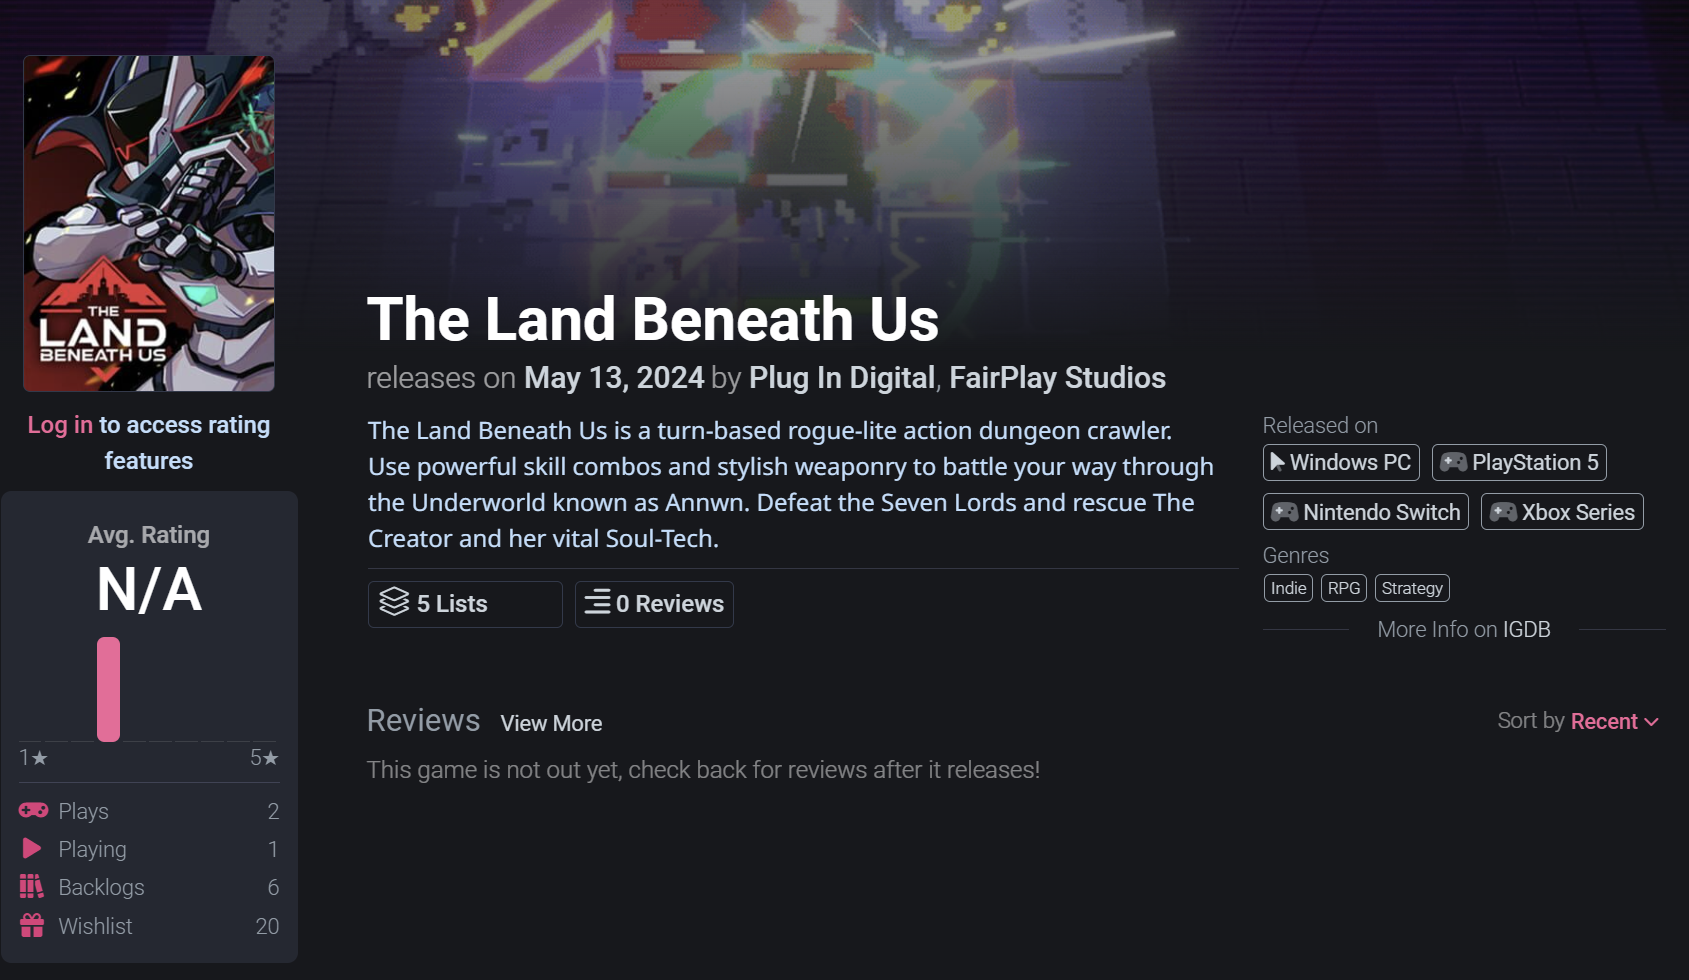


    1. We will look into games_df and see which rows have NaN "rating"
    2. Find the corresponding id of the game with the scores it's given in the scores_df
    3. Calculate the average rating of the game with a certain id
    4. Fill in the NaN value in games_df of with the average rating that was just calculated


In [56]:
# Identify the rows in games_df where 'rating' is NaN
nan_rating_ids = games_df[games_df['rating'].isna()]['id']

# For each of these rows, find the corresponding rows in scores_df
scores_df_filtered = scores_df[scores_df['id'].isin(nan_rating_ids)]

# Calculate the weighted average rating for each game
scores_df_filtered['total_score'] = scores_df_filtered['score'] * scores_df_filtered['amount']
grouped_scores = scores_df_filtered.groupby('id').agg({'total_score': 'sum', 'amount': 'sum'}).reset_index()
grouped_scores['average_rating'] = (grouped_scores['total_score'] / grouped_scores['amount']).round(1)

# Replace the NaN values in 'rating' in games_df with the calculated average rating
games_df.set_index('id', inplace=True)
grouped_scores.set_index('id', inplace=True)
games_df['rating'].fillna(grouped_scores['average_rating'], inplace=True)
games_df.reset_index(inplace=True)

C:\Users\kenar\AppData\Local\Temp\ipykernel_1396\2964695771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df_filtered['total_score'] = scores_df_filtered['score'] * scores_df_filtered['amount']
C:\Users\kenar\AppData\Local\Temp\ipykernel_1396\2964695771.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inpl

In [57]:
print(games_df.isna().sum())
games_df.sample(15)

id                 0
name               0
date           34623
rating         79226
reviews            0
plays              0
playing            0
backlogs           0
wishlists          0
description    18752
dtype: int64


id                             name       date  rating  reviews  \
117072  1117553         The Splitting: Chapter 3 2022-03-10     4.0      0.0   
132086  1132610                   The Great Fear 2023-09-11     NaN      0.0   
12456   1012532    Harukanaru Augusta 2: Masters 1993-09-22     4.0      0.0   
56987   1057299                       Let's Sing 2014-02-13     1.6      1.0   
32433   1032604        Rayman Collectors Edition 2004-12-31     NaN      0.0   
16409   1016504    SimCity 2000: Special Edition 1995-12-31     3.7      1.0   
8595    1008659                          Angband 1990-12-31     3.6      7.0   
109789  1110255  Firelight Fantasy: Force Energy 2021-06-16     NaN      0.0   
170354  1171048       Baseball for the XaviXPort        NaT     NaN      0.0   
86565   1086973                            Tayal 2018-10-10     3.0      1.0   
38691   1038906                        Baby Pals 2007-11-19     2.6      1.0   
140105  1140653                         God Game        NaT     NaN      0.0   
147315  1147902      Suicide Guy: Deluxe Edition        NaT     2.0      0.0   
145548  1146130   Odyssey: The Legend of Nemesis        NaT     4.0      0.0   
66288   1066638           The Flame in the Flood 2016-02-24     2.9     32.0   

        plays  playing  backlogs  wishlists  \
117072    3.0      0.0       1.0        0.0   
132086    0.0      0.0       0.0        0.0   
12456     3.0      0.0       0.0        0.0   
56987     4.0      0.0       1.0        1.0   
32433     0.0      0.0       0.0        0.0   
16409    85.0      2.0      66.0        2.0   
8595     27.0      3.0      17.0        9.0   
109789    0.0      0.0       2.0        0.0   
170354    0.0      0.0       0.0        0.0   
86565     1.0      0.0       1.0        2.0   
38691    11.0      0.0       1.0        1.0   
140105    0.0      0.0       0.0        0.0   
147315    3.0      0.0       1.0        0.0   
145548    1.0      0.0       3.0        4.0   
66288   609.0      9.0     588.0       55.0   

                                              description  
117072  The Splitting is a mystery adventure game.  In...  
132086  Deep Fear will make you plunge into an atmosph...  
12456   Harukanaru Augusta 2: Masters is a golf game t...  
56987   Let’s Sing PC is your chance to bring out your...  
32433   Rayman Collectors Edition is a compilation of ...  
16409   The ultimate city simulator. You design, build...  
8595    Angband is an open-source roguelike, the goal ...  
109789  Firelight Fantasy: Force Energy is a spectacul...  
170354                                                NaN  
86565   Tayal is an old-fashioned, mega style 2D platf...  
38691                                                 NaN  
140105                     Traditional jump climbing game  
147315  Suicide Guy Deluxe Edition is here! The surrea...  
145548  Odyssey: The Legend of Nemesis is a Mac-exclus...  
66288   A rogue-lite river journey through the backwat...

Previously we have 116412 missing values in the `rating` column.
Now we have 79226. It is in one way or another showing us that we are going into the right direction, but I am still not sure this is enough. It is possible that this happened due to the fact that they were in fact having not a single score given to them

example:
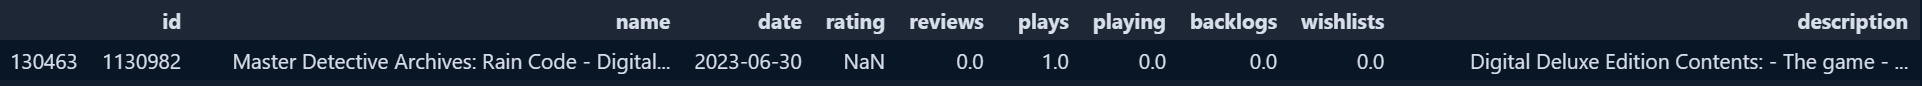


what is in the scores_df when it comes to this game's ratings:

    id,score,amount
    1130982,0.5,0
    1130982,1.0,0
    1130982,1.5,0
    1130982,2.0,0
    1130982,2.5,0
    1130982,3.0,0
    1130982,3.5,0
    1130982,4.0,0
    1130982,4.5,0
    1130982,5.0,0

In [58]:
new_combined_games = games_df.merge(genres_df_encoded, on='id', how='inner')

In [59]:
new_combined_games.head(15)

id                               name       date  rating  reviews  \
0   1000001  Cathode Ray Tube Amusement Device 1947-12-31     3.5     65.0   
1   1000002                   Bertie the Brain 1950-08-25     2.5     11.0   
2   1000003                                Nim 1951-12-31     1.8      2.0   
3   1000004                           Draughts 1952-08-31     2.4      3.0   
4   1000005                                OXO 1952-12-31     3.1     14.0   
5   1000006                               Pool 1954-06-26     3.0      5.0   
6   1000007                     Tennis for Two 1958-10-18     3.0     41.0   
7   1000008                  Mouse in the Maze 1959-01-16     2.6      3.0   
8   1000009                          Spacewar! 1962-04-30     3.0     25.0   
9   1000010                  The Sumerian Game 1964-12-31     2.6      3.0   
10  1000011                          Periscope 1965-12-31     2.1      2.0   
11  1000012                           Hamurabi 1968-12-31     2.4     14.0   
12  1000013                          Civil War 1968-12-31     1.8      3.0   
13  1000014                           Indy 500 1969-03-31     1.0      0.0   
14  1000015                          Yakyuuken 1969-04-27     NaN      1.0   

    plays  playing  backlogs  wishlists  \
0   117.0      1.0      28.0       56.0   
1    24.0      0.0       6.0       12.0   
2    11.0      0.0       2.0        6.0   
3    17.0      0.0       3.0        7.0   
4    52.0      1.0      12.0       13.0   
5    20.0      0.0       2.0        4.0   
6   100.0      0.0      18.0       29.0   
7    17.0      0.0       2.0        6.0   
8   124.0      0.0      23.0       36.0   
9    17.0      0.0       7.0        7.0   
10   20.0      0.0       7.0       11.0   
11   46.0      0.0       4.0       11.0   
12   14.0      0.0       2.0        2.0   
13    6.0      0.0       5.0        3.0   
14    3.0      0.0       3.0        2.0   

                                          description  ...  RPG  Racing  \
0   The cathode ray tube amusement device is the e...  ...    0       0   
1   Currently considered the first videogame in hi...  ...    0       0   
2   The Nimrod was a special purpose computer that...  ...    0       0   
3   A game of draughts (a.k.a. checkers) written f...  ...    0       0   
4   OXO was a computer game developed by Alexander...  ...    0       0   
5   A game of pool (billiards) developed by Willia...  ...    0       0   
6   Tennis for Two is often credited to be the wor...  ...    0       0   
7   A game where players place maze walls, bits of...  ...    0       0   
8   Spacewar! is one of the earliest digital compu...  ...    0       0   
9   The Sumerian Game is a text-based strategy vid...  ...    0       0   
10  The electro-mechanical game was released in th...  ...    0       0   
11  Hamurabi is a text-based game of land and reso...  ...    0       0   
12  A turn-based, strategic simulation of fourteen...  ...    0       0   
13  A first-person arcade racing game released by ...  ...    0       1   
14  One of the very first erotic video games ever ...  ...    0       0   

    Real Time Strategy  Shooter  Simulator  Sport  Strategy  Tactical  \
0                    0        0          0      0         0         0   
1                    0        0          0      0         0         1   
2                    0        0          0      0         1         0   
3                    0        0          0      0         0         0   
4                    0        0          0      0         1         0   
5                    0        0          0      1         0         0   
6                    0        0          0      1         0         0   
7                    0        0          1      0         0         0   
8                    0        1          1      0         0         0   
9                    0        0          0      0         1         0   
10                   0        1          0      0         0        

In [60]:
column_names = new_combined_games.columns
column_names

Index(['id', 'name', 'date', 'rating', 'reviews', 'plays', 'playing',
       'backlogs', 'wishlists', 'description', 'Adventure', 'Arcade',
       'Brawler', 'Card & Board Game', 'Fighting', 'Indie', 'MOBA', 'Music',
       'Pinball', 'Platform', 'Point-and-Click', 'Puzzle', 'Quiz/Trivia',
       'RPG', 'Racing', 'Real Time Strategy', 'Shooter', 'Simulator', 'Sport',
       'Strategy', 'Tactical', 'Turn Based Strategy', 'Visual Novel'],
      dtype='object')

In [61]:
new_combined_games.isna().sum()

id                         0
name                       0
date                   22013
rating                 63288
reviews                    0
plays                      0
playing                    0
backlogs                   0
wishlists                  0
description             7694
Adventure                  0
Arcade                     0
Brawler                    0
Card & Board Game          0
Fighting                   0
Indie                      0
MOBA                       0
Music                      0
Pinball                    0
Platform                   0
Point-and-Click            0
Puzzle                     0
Quiz/Trivia                0
RPG                        0
Racing                     0
Real Time Strategy         0
Shooter                    0
Simulator                  0
Sport                      0
Strategy                   0
Tactical                   0
Turn Based Strategy        0
Visual Novel               0
dtype: int64

It does seem like some of the ratings droped, due to the merging

old results: 

    id                 0
    name               0
    date           34623
    rating         79226
    reviews            0
    plays              0
    playing            0
    backlogs           0
    wishlists          0
    description    18752

new results: 

    id                         0
    name                       0
    date                   22013
    rating                 63288
    reviews                    0
    plays                      0
    playing                    0
    backlogs                   0
    wishlists                  0
    description             7694
    Adventure                  0
    Arcade                     0
    Brawler                    0
    Card & Board Game          0
    Fighting                   0
    Indie                      0
    MOBA                       0
    Music                      0
    Pinball                    0
    Platform                   0
    Point-and-Click            0
    Puzzle                     0
    Quiz/Trivia                0
    RPG                        0
    Racing                     0
    Real Time Strategy         0
    Shooter                    0
    Simulator                  0
    Sport                      0
    Strategy                   0
    Tactical                   0
    Turn Based Strategy        0
    Visual Novel               0

In [62]:
new_combined_games.shape

(146872, 33)

## Data Preprocessing

### Let's try some modeling
For this we are going to be using jaccard similiarity. It pretty much measures in the span between 0 and 1, witing 2 files/sets of data - the closer to 1 they are calculated, the more they are similiar to eachother

https://medium.com/@mayurdhvajsinhjadeja/jaccard-similarity-34e2c15fb524

In [63]:
# List of genre columns
genre_columns = [
    'Adventure', 'Arcade', 'Brawler', 'Card & Board Game', 'Fighting', 'Indie', 'MOBA', 
    'Music', 'Pinball', 'Platform', 'Point-and-Click', 'Puzzle', 'Quiz/Trivia', 'RPG', 
    'Racing', 'Real Time Strategy', 'Shooter', 'Simulator', 'Sport', 'Strategy', 'Tactical', 
    'Turn Based Strategy', 'Visual Novel'
]

# Create a list of columns to keep
columns_to_keep = ['name'] + genre_columns 

# Create a copy of the DataFrame with only these columns
jaccard_df = new_combined_games[columns_to_keep].copy()

In [64]:
jaccard_df.head(15)

name  Adventure  Arcade  Brawler  \
0   Cathode Ray Tube Amusement Device          0       0        0   
1                    Bertie the Brain          0       0        0   
2                                 Nim          0       0        0   
3                            Draughts          0       0        0   
4                                 OXO          0       0        0   
5                                Pool          0       0        0   
6                      Tennis for Two          0       1        0   
7                   Mouse in the Maze          0       0        0   
8                           Spacewar!          0       0        0   
9                   The Sumerian Game          0       0        0   
10                          Periscope          0       1        0   
11                           Hamurabi          0       0        0   
12                          Civil War          0       0        0   
13                           Indy 500          0       0        0   
14                          Yakyuuken          0       0        0   

    Card & Board Game  Fighting  Indie  MOBA  Music  Pinball  ...  RPG  \
0                   0         0      0     0      0        0  ...    0   
1                   0         0      0     0      0        0  ...    0   
2                   0         0      0     0      0        1  ...    0   
3                   1         0      0     0      0        0  ...    0   
4                   0         0      0     0      0        0  ...    0   
5                   0         0      0     0      0        0  ...    0   
6                   0         0      0     0      0        0  ...    0   
7                   0         0      0     0      0        0  ...    0   
8                   0         0      0     0      0        0  ...    0   
9                   0         0      0     0      0        0  ...    0   
10                  0         0      0     0      0        1  ...    0   
11                  0         0      0     0      0        0  ...    0   
12                  0         0      0     0      0        0  ...    0   
13                  0         0      0     0      0        0  ...    0   
14                  1         0      0     0      0        0  ...    0   

    Racing  Real Time Strategy  Shooter  Simulator  Sport  Strategy  Tactical  \
0        0                   0        0          0      0         0         0   
1        0                   0        0          0      0         0         1   
2        0                   0        0          0      0         1         0   
3        0                   0        0          0      0         0         0   
4        0                   0        0          0      0         1         0   
5        0                   0        0          0      1         0         0   
6        0                   0        0          0      1         0         0   
7        0                   0        0          1      0         0         0   
8        0                   0        1          1      0         0         0   
9        0                   0        0          0      0         1         0   
10       0                   0        1          0      0         0         0   
11       0                   0        0          0      0         1         0   
12       0                   0        0          0      0         1         0   
13       1                   0        0          0      0         0         0   
14       0                   0        0          0      0         0         0   

    Turn Based Strategy  Visual Novel  
0                     0             0  
1                     0             0  
2                     0             0  
3                     0             0  
4                     0             0  
5                     0             0  
6                     0             0  
7                     0             0  
8                     0             0  
9                     0             0  
10    

In [65]:
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [66]:
# Exclude the 'name' column when calculating the Jaccard distance
from sklearnex import patch_sklearn
patch_sklearn()
jaccard_distance = pdist(jaccard_df.drop(columns='name').values, metric='jaccard')
print(jaccard_distance)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[1. 1. 1. ... 1. 1. 1.]


In [67]:
# Patch sklearn to accelerate computations
patch_sklearn()

# Create a subset of your data
subset_size = 30000  # Adjust this value to fit in your memory
jaccard_df_subset = jaccard_df.sample(n=subset_size)

# Calculate the Jaccard distance for the subset
jaccard_distance_subset = pdist(jaccard_df_subset.drop(columns='name').values, metric='jaccard')

# Convert the condensed distance vector to a square-form distance matrix
square_jaccard_distances_subset = squareform(jaccard_distance_subset)

square_jaccard_distances_subset

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.66666667],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        0.        ]])

Considering the fact that we used pdist it calculates the distance, so it actually shows how different the games are. As we want the opposite, we will reverse it

In [68]:
jaccard_similiarity_array = 1 - square_jaccard_distances_subset
print(jaccard_similiarity_array)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.33333333]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.33333333 0.         1.        ]]


In [69]:
distance_df = pd.DataFrame(jaccard_similiarity_array, index = jaccard_df_subset['name'], columns=jaccard_df_subset['name'])

In [70]:
distance_df.sample(20)

name                                                3D Paraglider  \
name                                                                
Synthwave Racers                                             0.00   
Light of Altair                                              0.20   
This is a Ghost                                              0.00   
Championship Wrestling                                       0.50   
Sonic Labyrinth                                              0.00   
Madara Saga                                                  0.00   
Middle Earth Hero                                            0.00   
Zombeer: Delivery Mission                                    0.00   
Save the Earth                                               0.25   
Construction Worker Simulator                                0.50   
Ninja clowns                                                 0.00   
Bocchi the Escape                                            0.00   
Skaut Kwatermaster                                           0.00   
Ghost in the Shell: Stand Alone Complex - First...           0.00   
Crazy Machines Elements                                      0.25   
Sublevel Zero                                                0.25   
Aban Hawkins & the 1000 Spikes                               0.00   
Weedcraft Inc & Big Pharm Pharmacy Tycoon Bundle             0.25   
Zookeeper Battle!                                            0.00   
Pinball Heroes: Fat Princess                                 0.00   

name                                                Fatal Fury: Wild Ambition  \
name                                                                            
Synthwave Racers                                                     0.000000   
Light of Altair                                                      0.000000   
This is a Ghost                                                      0.000000   
Championship Wrestling                                               0.000000   
Sonic Labyrinth                                                      0.200000   
Madara Saga                                                          0.000000   
Middle Earth Hero                                                    0.000000   
Zombeer: Delivery Mission                                            0.000000   
Save the Earth                                                       0.000000   
Construction Worker Simulator                                        0.000000   
Ninja clowns                                                         0.333333   
Bocchi the Escape                                                    0.000000   
Skaut Kwatermaster                                                   0.000000   
Ghost in the Shell: Stand Alone Complex - First...                   0.000000   
Crazy Machines Elements                                              0.000000   
Sublevel Zero                                                        0.000000   
Aban Hawkins & the 1000 Spikes                                       0.000000   
Weedcraft Inc & Big Pharm Pharmacy Tycoon Bundle                     0.000000   
Zookeeper Battle!                                                    0.000000   
Pinball Heroes: Fat Princess                                         0.333333   

name                                                Voxel Doom II  \
name                                                                
Synthwave Racers                                         0.000000   
Light of Altair                                          0.000000   
This is a Ghost                                          0.000000   
Championship Wrestling                                   0.000000   
Sonic Labyrinth                                          0.000000   
Madara Saga                                              0.000000   
Middle Earth Hero                                        0.000000   
Zombeer: Delivery Mission                                0.000000   
Save the

The next steps, which are about to be taken into consideration are:

    1. Continue working on the model so that it will show similiar games
    2. Possibly add the other features 'plays','wishlists' etc.
    3. Find a way to work around the occasional memory errors 

In [72]:
def get_top5_similar_games(game_name):
        
    # Find the values for the specified game
    jaccard_distance_series = distance_df.loc[game_name]

    # Sort these values from lowest to highest (because lower distance means more similarity)
    ordered_distances = jaccard_distance_series.sort_values()

    # Return the top 5 games
    return ordered_distances.index[1:6]  # We start from index 1 because the most similar game to the input game is the game itself

print(get_top5_similar_games('Sublevel Zero'))

Index(['Harry Potter and the Sorcerer's Stone', 'Pokémon Blaze Black 2 Redux',
       'Age of Empires II: Definitive Edition - Lords of the West',
       'Bomber Man Special', 'Monster Fishing'],
      dtype='object', name='name')


In [73]:
def get_top5_similar_games(game_name):
    # Find the values for the specified game
    jaccard_distance_series = distance_df.loc[game_name]

    # Sort these values from lowest to highest (because lower distance means more similarity)
    ordered_distances = jaccard_distance_series.sort_values()

    # Return the top 5 games and their distances
    return ordered_distances[1:6]  # We start from index 1 because the most similar game to the input game is the game itself

print(get_top5_similar_games('Sublevel Zero'))

name
Harry Potter and the Sorcerer's Stone                        0.0
Pokémon Blaze Black 2 Redux                                  0.0
Age of Empires II: Definitive Edition - Lords of the West    0.0
Bomber Man Special                                           0.0
Monster Fishing                                              0.0
Name: Sublevel Zero, dtype: float64


### Current conclusion:

After running the whole notebook with the mainly the genres and the name, we find out the the games that are with the same genre are pretty much the same - this is what currently is calculated:

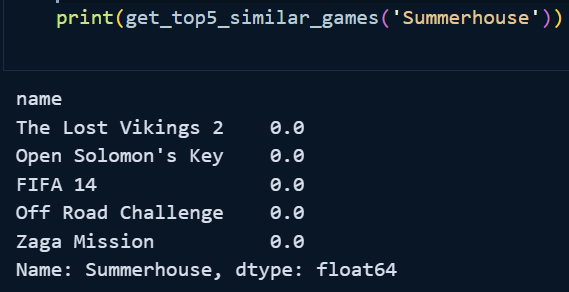

However we do need to be more precise with this program, that is why I am going to redo the features selection and add in the `plays`,`playing`,`backlogs`,`reviews` and `wishlists` columns, since they are also cleaned

### Adding in the new features and training with them

In [74]:
# List of genre columns
genre_columns_2 = [
    'Adventure', 'Arcade', 'Brawler', 'Card & Board Game', 'Fighting', 'Indie', 'MOBA', 
    'Music', 'Pinball', 'Platform', 'Point-and-Click', 'Puzzle', 'Quiz/Trivia', 'RPG', 
    'Racing', 'Real Time Strategy', 'Shooter', 'Simulator', 'Sport', 'Strategy', 'Tactical', 
    'Turn Based Strategy', 'Visual Novel'
]

# Create a list of columns to keep
columns_to_keep_2 = ['name'] + genre_columns_2 + ['reviews', 'plays', 'playing', 'backlogs', 'wishlists']

# Create a copy of the DataFrame with only these columns
jaccard_df_more = new_combined_games[columns_to_keep_2].copy()

In [76]:
jaccard_df_more.head(15)

name  Adventure  Arcade  Brawler  \
0   Cathode Ray Tube Amusement Device          0       0        0   
1                    Bertie the Brain          0       0        0   
2                                 Nim          0       0        0   
3                            Draughts          0       0        0   
4                                 OXO          0       0        0   
5                                Pool          0       0        0   
6                      Tennis for Two          0       1        0   
7                   Mouse in the Maze          0       0        0   
8                           Spacewar!          0       0        0   
9                   The Sumerian Game          0       0        0   
10                          Periscope          0       1        0   
11                           Hamurabi          0       0        0   
12                          Civil War          0       0        0   
13                           Indy 500          0       0        0   
14                          Yakyuuken          0       0        0   

    Card & Board Game  Fighting  Indie  MOBA  Music  Pinball  ...  Sport  \
0                   0         0      0     0      0        0  ...      0   
1                   0         0      0     0      0        0  ...      0   
2                   0         0      0     0      0        1  ...      0   
3                   1         0      0     0      0        0  ...      0   
4                   0         0      0     0      0        0  ...      0   
5                   0         0      0     0      0        0  ...      1   
6                   0         0      0     0      0        0  ...      1   
7                   0         0      0     0      0        0  ...      0   
8                   0         0      0     0      0        0  ...      0   
9                   0         0      0     0      0        0  ...      0   
10                  0         0      0     0      0        1  ...      0   
11                  0         0      0     0      0        0  ...      0   
12                  0         0      0     0      0        0  ...      0   
13                  0         0      0     0      0        0  ...      0   
14                  1         0      0     0      0        0  ...      0   

    Strategy  Tactical  Turn Based Strategy  Visual Novel  reviews  plays  \
0          0         0                    0             0     65.0  117.0   
1          0         1                    0             0     11.0   24.0   
2          1         0                    0             0      2.0   11.0   
3          0         0                    0             0      3.0   17.0   
4          1         0                    0             0     14.0   52.0   
5          0         0                    0             0      5.0   20.0   
6          0         0                    0             0     41.0  100.0   
7          0         0                    0             0      3.0   17.0   
8          0         0                    0             0     25.0  124.0   
9          1         0                    0             0      3.0   17.0   
10         0         0                    0             0      2.0   20.0   
11         1         0                    0             0     14.0   46.0   
12         1         0                    1             0      3.0   14.0   
13         0         0                    0             0      0.0    6.0   
14         0         0                    0             0      1.0    3.0   

    playing  backlogs  wishlists  
0       1.0      28.0       56.0  
1       0.0       6.0       12.0  
2       0.0       2.0        6.0  
3       0.0       3.0        7.0  
4       1.0      12.0       13.0  
5       0.0       2.0        4.0  
6       0.0      18.0       29.0  
7       0.0       2.0        6.0  
8       0.0      23.0       36.0  
9       0.0       7.0        7.0  
10      0.0       7.0       11.0  
11      0.0       4.0       11.0  
12      0.0       2.0  

In [84]:
#patch_sklearn()
#jaccard_distance_bigger = pdist(jaccard_df_more.drop(columns='name').values, metric='jaccard')
#print(jaccard_distance_bigger)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


MemoryError: Unable to allocate 80.4 GiB for an array with shape (10785618756,) and data type float64